# Hamiltonian centre

## Dynamic Equations

Hamiltonian 

\begin{equation}
    H(q,p) = \frac{\omega}{2}(p^2 + q^2)
\end{equation}

Hamilton's equations (Hamiltonian vector field)

\begin{align*}
    \dot{q} &= \frac{\partial H}{\partial p} = \omega p \\
    \dot{p} &= -\frac{\partial H}{\partial q} = -\omega q
\end{align*}

Analytical solution for initial conditions $(q_0, p_0) \in \mathbb{R}^2$


\begin{equation*}
\begin{pmatrix}
    q(\Delta t)\\
    p(\Delta t)
\end{pmatrix}
    =
    \begin{pmatrix}
        \cos \omega \Delta t & \sin \omega \Delta t \\
        -\sin \omega \Delta t & \cos \omega \Delta t
    \end{pmatrix}
    \begin{pmatrix}
        q_0\\
        p_0
    \end{pmatrix}
\end{equation*}

Here, we define the _dynamic evolution operator_ as

\begin{equation}
A_0 =
    \begin{pmatrix}
        \cos \omega \Delta t & \sin \omega \Delta t \\
        -\sin \omega \Delta t & \cos \omega \Delta t
    \end{pmatrix}
\end{equation}

which clearly depends on $\omega$ and $\Delta t$

## Simulating orbits

Take $\omega = 1$ and $\Delta t = 1$

Define domain for I.Cs : $(q_0, p_0) \in [-1,1] \times[-1,1] \subset \mathbb{R}^2$

Define original _dynamic evolution operator_ $A_0$

In [127]:
import numpy

In [128]:
omega=1
dt=1

a_11 = numpy.cos(omega*dt)
a_12 = numpy.sin(omega*dt)
a_21 = -a_12
a_22 = a_11 

A_0 = numpy.matrix([
    [a_11, a_12],
    [a_21, a_22]
    ])

In [129]:
A_0

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])

In [130]:
def dynamics(x0,omega=1,dt=1):
    a_11 = numpy.cos(omega*dt)
    a_12 = numpy.sin(omega*dt)
    a_21 = -a_12
    a_22 = a_11 
    
    A = numpy.matrix([
        [a_11, a_12],
        [a_21, a_22]
        ])
    
    x = numpy.matmul(A, x0)
    return numpy.asarray(x)

Compute trajectories for $N$ iterations for all I.C.s

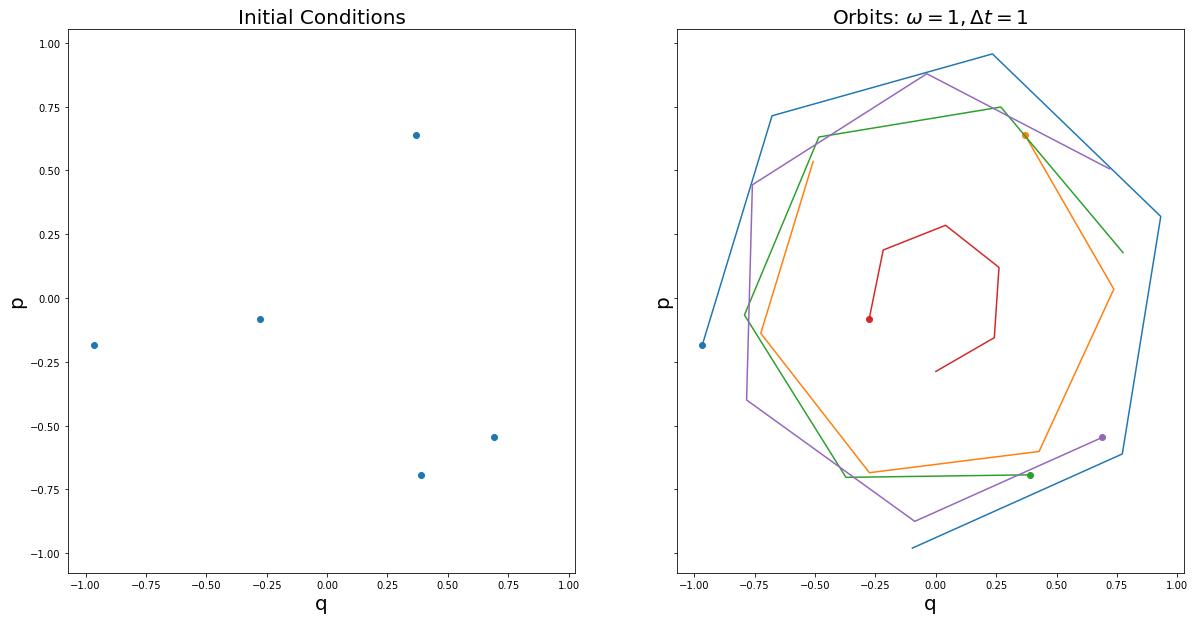

In [131]:
import matplotlib.pyplot as plt

N = 5 # number of ICs
x0 = 2*numpy.random.rand(2,N)-1 # Initial conditions
M = 5 # Number of iterations

fig,ax = plt.subplots(1,2,figsize=(20,10),sharex=True,sharey=True)

#################################################

# PLOT INITIAL CONDITIONS

#################################################
ax[0].scatter(*x0)
ax[0].set_title("Initial Conditions", fontsize=20)
ax[0].set_xlabel("q", fontsize=20)
ax[0].set_ylabel("p", fontsize=20)
#################################################

# PLOT ORBITS

#################################################
X  = [] # Orbits for M iterations
for n in range(M):
    X.append(x0)
    x = dynamics(x0)
    x0 = x

X.append(x0)
X = numpy.array(X).T

for n in range(N):
    x = X[n]
    q,p = numpy.array(x)
    ax[1].scatter(q[0],p[0])
    ax[1].plot(q,p)
    
ax[1].set_title("Orbits: $\omega = 1, \Delta t = 1$", fontsize=20)
ax[1].set_xlabel("q", fontsize=20)
ax[1].set_ylabel("p", fontsize=20)

plt.show()

## DMD APPLICATION: Proof of concept

### Construct trajectory matrices (DONE)

In [8]:
X

array([[[ 0.15024807, -0.37478011, -0.55523718, -0.22521175,
          0.31187233,  0.56222242],
        [-0.54186002, -0.41919761,  0.08887315,  0.51523435,
          0.46789146, -0.00962868]],

       [[-0.30733218,  0.37064123,  0.70784881,  0.39426345,
         -0.2818059 , -0.69878421],
        [ 0.63780395,  0.60321806,  0.01403627, -0.58805041,
         -0.64948625, -0.11378743]],

       [[ 0.40623213, -0.54204332, -0.99196664, -0.52988041,
          0.41937543,  0.98305943],
        [-0.90500027, -0.83080628,  0.00722717,  0.838616  ,
          0.89898514,  0.13283149]],

       [[ 0.12513714,  0.33507828,  0.23695   , -0.07902902,
         -0.32234912, -0.26930293],
        [ 0.31785576,  0.06643893, -0.24606154, -0.33233417,
         -0.11306029,  0.2101607 ]],

       [[-0.99618996, -0.29478084,  0.67764843,  1.02705085,
          0.43218746, -0.56002709],
        [ 0.28933011,  0.99459067,  0.78542915, -0.1458523 ,
         -0.94303783, -0.87319872]]])

In [9]:
# Reshape data matrix
D = 2
Y = X.reshape((D*N,M+1))

In [10]:
Y

array([[ 0.15024807, -0.37478011, -0.55523718, -0.22521175,  0.31187233,
         0.56222242],
       [-0.54186002, -0.41919761,  0.08887315,  0.51523435,  0.46789146,
        -0.00962868],
       [-0.30733218,  0.37064123,  0.70784881,  0.39426345, -0.2818059 ,
        -0.69878421],
       [ 0.63780395,  0.60321806,  0.01403627, -0.58805041, -0.64948625,
        -0.11378743],
       [ 0.40623213, -0.54204332, -0.99196664, -0.52988041,  0.41937543,
         0.98305943],
       [-0.90500027, -0.83080628,  0.00722717,  0.838616  ,  0.89898514,
         0.13283149],
       [ 0.12513714,  0.33507828,  0.23695   , -0.07902902, -0.32234912,
        -0.26930293],
       [ 0.31785576,  0.06643893, -0.24606154, -0.33233417, -0.11306029,
         0.2101607 ],
       [-0.99618996, -0.29478084,  0.67764843,  1.02705085,  0.43218746,
        -0.56002709],
       [ 0.28933011,  0.99459067,  0.78542915, -0.1458523 , -0.94303783,
        -0.87319872]])

Pairs of rows of this matrix represent

\begin{equation}
\left\{
\left(
\begin{array}{c}
x_0 \\ y_0
\end{array}
\right), \, 
A \left(
\begin{array}{c}
x_0 \\ y_0
\end{array}
\right), \, 
A^2 \left(
\begin{array}{c}
x_0 \\ y_0
\end{array}
\right), \ldots ,
A^n \left(
\begin{array}{c}
x_0 \\ y_0
\end{array}
\right)
\right\},
\end{equation}

In [11]:
Y_back = Y[:].T[:M].T
Y_forth = Y[:].T[1:M+1].T

Then, the matrix below represents $D_0^{n-1}$ 

In [12]:
Y_back

array([[ 0.15024807, -0.37478011, -0.55523718, -0.22521175,  0.31187233],
       [-0.54186002, -0.41919761,  0.08887315,  0.51523435,  0.46789146],
       [-0.30733218,  0.37064123,  0.70784881,  0.39426345, -0.2818059 ],
       [ 0.63780395,  0.60321806,  0.01403627, -0.58805041, -0.64948625],
       [ 0.40623213, -0.54204332, -0.99196664, -0.52988041,  0.41937543],
       [-0.90500027, -0.83080628,  0.00722717,  0.838616  ,  0.89898514],
       [ 0.12513714,  0.33507828,  0.23695   , -0.07902902, -0.32234912],
       [ 0.31785576,  0.06643893, -0.24606154, -0.33233417, -0.11306029],
       [-0.99618996, -0.29478084,  0.67764843,  1.02705085,  0.43218746],
       [ 0.28933011,  0.99459067,  0.78542915, -0.1458523 , -0.94303783]])

And the matrix below represents $D_1^{n}$ 

In [13]:
Y_forth

array([[-0.37478011, -0.55523718, -0.22521175,  0.31187233,  0.56222242],
       [-0.41919761,  0.08887315,  0.51523435,  0.46789146, -0.00962868],
       [ 0.37064123,  0.70784881,  0.39426345, -0.2818059 , -0.69878421],
       [ 0.60321806,  0.01403627, -0.58805041, -0.64948625, -0.11378743],
       [-0.54204332, -0.99196664, -0.52988041,  0.41937543,  0.98305943],
       [-0.83080628,  0.00722717,  0.838616  ,  0.89898514,  0.13283149],
       [ 0.33507828,  0.23695   , -0.07902902, -0.32234912, -0.26930293],
       [ 0.06643893, -0.24606154, -0.33233417, -0.11306029,  0.2101607 ],
       [-0.29478084,  0.67764843,  1.02705085,  0.43218746, -0.56002709],
       [ 0.99459067,  0.78542915, -0.1458523 , -0.94303783, -0.87319872]])

__TEST__ Show that $D_1^n = A_0 D_0^{n-1}$

Below, we show how the _dynamic evolution operator_ ($A_0$) maps the rows of $D_0^{n-1}$ to the rows of $D_1^n$.

In [14]:
numpy.dot(A_0, Y_back[:2,:])

matrix([[-0.37478011, -0.55523718, -0.22521175,  0.31187233,  0.56222242],
        [-0.41919761,  0.08887315,  0.51523435,  0.46789146, -0.00962868]])

In [15]:
numpy.allclose(Y_forth[:2,:], numpy.dot(A_0, Y_back[:2,:]))

True

### SVD of back snapshots matrix (REVISE!)

<span style='color:red'><b>NOTE</b></span> Shoudl I include this section? It seems that the computation step of the pseudo-inverse can be replaced by this.

Compute SVD of $D_0^{n-1}$ to obtain 

\begin{equation}
    D_0^{n-1}= U \Sigma V^T
\end{equation}

In [17]:
U, S, Vh = numpy.linalg.svd(Y_back, full_matrices=True)
U.shape, S.shape, Vh.shape

((10, 10), (5,), (5, 5))

__NOTE__

SVD computation is performed using the _LAPACK_ routine. See details in documentation
https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html

In [18]:
U

array([[ 0.05135991,  0.32087229,  0.40966509,  0.63774695,  0.25046739,
        -0.11345207,  0.21019578, -0.15641942,  0.40797734,  0.09568892],
       [ 0.32087229, -0.05135991, -0.80813346,  0.39026065, -0.03992072,
        -0.01986278,  0.11638381,  0.03264354,  0.11600922,  0.24282286],
       [ 0.00811158, -0.40906675, -0.0141208 ,  0.23630128,  0.49207628,
        -0.53420508, -0.05875062, -0.07045751, -0.42405707, -0.24658969],
       [-0.40906675, -0.00811158, -0.23582103,  0.28882633, -0.03760763,
         0.30536134, -0.43088234, -0.35542688,  0.15702587, -0.51211476],
       [ 0.00417659,  0.57325881, -0.09661406, -0.09707228, -0.17287177,
        -0.4475865 , -0.3506906 , -0.42307571, -0.25714375,  0.2329837 ],
       [ 0.57325881, -0.00417659,  0.2411343 ,  0.26822495, -0.08505413,
         0.48312347, -0.19572518, -0.13861481, -0.49286781, -0.01352525],
       [-0.14219929, -0.13693371,  0.04513055,  0.16408045, -0.60437526,
        -0.13533563,  0.59815765, -0.31538571

Check if matrices a identical within numeric accuracy

In [19]:
numpy.allclose(Y_back, numpy.dot(U[:, :5] * S, Vh))

True

The above shows the reconstruction of $D_0^{n-1}$ from its SVD matrices.

__NOTE__ See documenation for details of algorithm for element-wise comparison of matrices
https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html 

### Compute Pseudo-inverse of snapshots matrix (DONE)

Original snapshot matrix $Y = D_0^{n-1}$

In [20]:
Y_back

array([[ 0.15024807, -0.37478011, -0.55523718, -0.22521175,  0.31187233],
       [-0.54186002, -0.41919761,  0.08887315,  0.51523435,  0.46789146],
       [-0.30733218,  0.37064123,  0.70784881,  0.39426345, -0.2818059 ],
       [ 0.63780395,  0.60321806,  0.01403627, -0.58805041, -0.64948625],
       [ 0.40623213, -0.54204332, -0.99196664, -0.52988041,  0.41937543],
       [-0.90500027, -0.83080628,  0.00722717,  0.838616  ,  0.89898514],
       [ 0.12513714,  0.33507828,  0.23695   , -0.07902902, -0.32234912],
       [ 0.31785576,  0.06643893, -0.24606154, -0.33233417, -0.11306029],
       [-0.99618996, -0.29478084,  0.67764843,  1.02705085,  0.43218746],
       [ 0.28933011,  0.99459067,  0.78542915, -0.1458523 , -0.94303783]])

Moore-Penrose pseudo-inverse $Y^+$

In [21]:
Y_back_pinv = numpy.linalg.pinv(Y_back)

In [22]:
Y_back_pinv

array([[ 0.03118689, -0.06132577, -0.05235564,  0.06901305,  0.07070945,
        -0.09865034,  0.00728049,  0.04115732, -0.12649091,  0.01048303],
       [-0.06004203, -0.04252129,  0.06488795,  0.06611266, -0.09339514,
        -0.09013461,  0.04467702, -0.0013112 , -0.00855299,  0.13546124],
       [-0.09606859,  0.01537707,  0.12247386,  0.00242859, -0.17163267,
         0.00125046,  0.04099771, -0.04257421,  0.11724851,  0.13589701],
       [-0.04377013,  0.05913782,  0.06745787, -0.06348831, -0.09207191,
         0.09148587, -0.00037471, -0.04469469,  0.13525227,  0.0113897 ],
       [ 0.04877039,  0.04852753, -0.04957858, -0.07103436,  0.07213934,
         0.09760959, -0.04140262, -0.00572307,  0.02890572, -0.12358925]])

In [23]:
Y_back_pinv.shape

(5, 10)

__TEST__: Verify $Y = Y Y^+ Y$

In [24]:
# Verify the above property
numpy.allclose(Y_back, numpy.dot(Y_back, numpy.dot(Y_back_pinv, Y_back)))

True

__TEST__: Verify that $ (Y' Y^+) Y = A_1 Y \approx Y' = A_0 Y$

In [25]:
A_1 = numpy.dot(Y_forth, Y_back_pinv)
A_1

array([[ 0.05705423,  0.0888567 , -0.05082484, -0.12285723,  0.07585333,
         0.17014686, -0.06016244, -0.02226538,  0.08418236, -0.17568007],
       [-0.0888567 ,  0.05705423,  0.12285723, -0.05082484, -0.17014686,
         0.07585333,  0.02226538, -0.06016244,  0.17568007,  0.08418236],
       [-0.09056316, -0.09734155,  0.09044736,  0.14086342, -0.13203371,
        -0.19386185,  0.07952402,  0.01413543, -0.06502392,  0.23650328],
       [ 0.09734155, -0.09056316, -0.14086342,  0.09044736,  0.19386185,
        -0.13203371, -0.01413543,  0.07952402, -0.23650328, -0.06502392],
       [ 0.12314798,  0.13977931, -0.12133267, -0.20073291,  0.17756663,
         0.27654364, -0.11084672, -0.02281912,  0.10005766, -0.32878347],
       [-0.13977931,  0.12314798,  0.20073291, -0.12133267, -0.27654364,
         0.17756663,  0.02281912, -0.11084672,  0.32878347,  0.10005766],
       [ 0.00479055, -0.06397122, -0.02024036,  0.0781934 ,  0.02537915,
        -0.11028874,  0.02105638,  0.03279337

In [26]:
numpy.allclose(Y_forth, numpy.dot(A_1, Y_back))

True

__NOTE__ $A_1$ doesn't have a block matrix structure like $A_0$.

### SVD of Pseudo-inverse of Snapshots matrix (DONE)

The pseudo-inverse $Y^+$ is computed via the SVD of $Y$.

Since, 

\begin{equation*}
    (A B)^+ = B^+ A^+
\end{equation*}

for any two matrices.

And $U^+ = U^T$, for $U$ square unitary matrix ($U U^T = U^T U = I$).

Then,

\begin{equation}
    Y^+ = (U \Sigma V^T)+ = V \Sigma^+ U^T
\end{equation}

In [27]:
V, S_pinv, Uh = numpy.linalg.svd(Y_back_pinv, full_matrices=True)
Y_back_pinv.shape, V.shape, S_pinv.shape, Uh.shape

((5, 10), (5, 5), (5,), (10, 10))

__TEST__: Verify $Y^+ = V \Sigma^+ U^T$

In [28]:
numpy.allclose(Y_back_pinv, numpy.linalg.multi_dot([V, numpy.diag(S_pinv), Uh[:5]]))

True

__NOTE__ To reconstruct the PS of $Y$, only the first 5 columns  of $U$ (out of 400) were used. 

### Truncate decomposition matrices (DONE)

Since some of the singular values of $\Sigma$ will be zero. We can further truncate all the decomposition matrices to reconstruct $Y^+$

Then, we define lower-rank matrices $U_r, \Sigma_r^+, V_r$, with $r = rank \leq n$

In [29]:
U_r = Uh[:2].T
S_pinv_r = numpy.diag(S_pinv[:2])
V_r = V[:, :2]

In [30]:
Y_back_pinv.shape, V_r.shape, S_pinv_r.shape, U_r.T.shape

((5, 10), (5, 2), (2, 2), (2, 10))

__TEST__: Verify $Y^+ = V_r \Sigma_r^+ U_r^T$

In [31]:
numpy.allclose(Y_back_pinv, numpy.linalg.multi_dot([V_r, S_pinv_r, U_r.T]))

True

### Data-based evolution operator (DONE)

The data-reconstructred dynamical evolution operator $A$ is computed by

\begin{equation}
    A_0 \approx Y' Y^+ = Y \left( V_r \Sigma_{r}^{+} U_{r}^T \right) = A_{DMD}
\end{equation}


In [32]:
Y_forth.shape, V_r.shape, S_pinv_r.shape, U_r.T.shape

((10, 5), (5, 2), (2, 2), (2, 10))

Next, we define the DMD _dynamical evolution operator_ $A_{DMD}$

In [33]:
A_dmd = numpy.linalg.multi_dot([Y_forth, V_r, S_pinv_r, U_r.T])

In [34]:
A_dmd

array([[ 0.05705423,  0.0888567 , -0.05082484, -0.12285723,  0.07585333,
         0.17014686, -0.06016244, -0.02226538,  0.08418236, -0.17568007],
       [-0.0888567 ,  0.05705423,  0.12285723, -0.05082484, -0.17014686,
         0.07585333,  0.02226538, -0.06016244,  0.17568007,  0.08418236],
       [-0.09056316, -0.09734155,  0.09044736,  0.14086342, -0.13203371,
        -0.19386185,  0.07952402,  0.01413543, -0.06502392,  0.23650328],
       [ 0.09734155, -0.09056316, -0.14086342,  0.09044736,  0.19386185,
        -0.13203371, -0.01413543,  0.07952402, -0.23650328, -0.06502392],
       [ 0.12314798,  0.13977931, -0.12133267, -0.20073291,  0.17756663,
         0.27654364, -0.11084672, -0.02281912,  0.10005766, -0.32878347],
       [-0.13977931,  0.12314798,  0.20073291, -0.12133267, -0.27654364,
         0.17756663,  0.02281912, -0.11084672,  0.32878347,  0.10005766],
       [ 0.00479055, -0.06397122, -0.02024036,  0.0781934 ,  0.02537915,
        -0.11028874,  0.02105638,  0.03279337

In [35]:
A_dmd.shape

(10, 10)

__TEST__ : $A_{DMD} Y \approx Y'$ 

In [36]:
numpy.allclose(Y_forth, numpy.dot(A_dmd, Y_back))

True

### Rank-reduced data-based evolution operator (DONE)

So far, we have shown that 

\begin{equation*}
    Y' = A_{DMD} Y
\end{equation*}

However, $A_{DMD} \neq block(A_0)$.


Now, we define a rank-reduced version of $A_{DMD}$ - namely $\tilde{A}_{DMD} \in \mathbb{R}^{r \times r}$, obtained by projecting the latter onto the $U_r$ modes.

\begin{equation}
    \tilde{A}_{DMD} = U_r^T A_{DMD} U_r
\end{equation}

__NOTE__ The above represents a similarity transformation, hence $A_{DMD}$ and $\tilde{A}_{DMD}$ should have the same _eigenvalues_.

See https://en.wikipedia.org/wiki/Matrix_similarity

In [37]:
U_r.T.shape, A_dmd.shape, U_r.shape

((2, 10), (10, 10), (10, 2))

In [38]:
A_dmd_r = numpy.linalg.multi_dot([U_r.T, A_dmd, U_r])
A_dmd_r

array([[ 0.54030231, -0.84147098],
       [ 0.84147098,  0.54030231]])

In [39]:
A_dmd_r.shape

(2, 2)

Then, we compare with the original matrix $A_0$

In [40]:
A_0

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])

<span style='color:red'>__NOTE__ </span> $A_0 = \tilde{A}_{DMD}^T$

### DMD modes (DONE)

The DMD modes will only be the eigenvectors of $\tilde{A}_{DMD}$, which are identical to the eigenvectors of $A_0$.

So, the DMD modes will be computed from solving the eigendecomposition problem

\begin{equation}
    \tilde{A}_{DMD} W = W \Lambda
\end{equation}

where $\Lambda$ is the diagonal matrix containing $\lambda$ eigenvalues and $W$ is a matrix with eigenvectors $w$ as columns, also called _DMD modes_

__TEST__ If $\tilde{A}_{DMD} W = W \Lambda$, then $A_0 W = W \Lambda$

In [44]:
Lambda, W = numpy.linalg.eig(A_dmd_r)

In [45]:
W

array([[7.07106781e-01+0.j        , 7.07106781e-01-0.j        ],
       [1.34015774e-16-0.70710678j, 1.34015774e-16+0.70710678j]])

In [46]:
Lambda

array([0.54030231+0.84147098j, 0.54030231-0.84147098j])

Compare with the eigen-decomposition of $A_0$

In [47]:
numpy.linalg.eig(A_0)

(array([0.54030231+0.84147098j, 0.54030231-0.84147098j]),
 matrix([[0.70710678+0.j        , 0.70710678-0.j        ],
         [0.        +0.70710678j, 0.        -0.70710678j]]))

## DMD IMPLEMENTATION: Computational script

In [132]:
def dmd(X): 
    """Compute DMD from input trajectory-data list X"""
    N_trajs, PS_dimension, N_snapshots = X.shape 
    
    # Reshape trajectory data as matrix
    Y = X.reshape((PS_dimension*N_trajs, N_snapshots))

    # Define backward and forward snapshot matrices: (Y, Y')
    Y_back = Y[:].T[:N_snapshots-1].T
    Y_forth = Y[:].T[1:N_snapshots].T

    # Compute Moore-Penrose pseudoinverse of Y: Y^+
    Y_back_pinv = numpy.linalg.pinv(Y_back)

    # Compute SVD matrices of Y^+
    V, S_pinv, Uh = numpy.linalg.svd(Y_back_pinv, full_matrices=True)
    
    # Determine matrix rank for reduction
    threshold = 1e-3 # To remove zero singular values
    rank = sum(S_pinv >= tolerance)

    # Define low-rank matrices
    U_r = Uh[:rank].T
    S_pinv_r = numpy.diag(S_pinv[:rank])
    V_r = V[:, :rank]

    # Data-based dynamical evolution operator
    A_dmd = numpy.linalg.multi_dot([Y_forth, V_r, S_pinv_r, U_r.T])

    # Rank-reduced data-based dynamical evolution operator
    A_dmd_r = numpy.linalg.multi_dot([U_r.T, A_dmd, U_r])
    
    return A_dmd_r.T

In [133]:
dmd(X)

array([[ 0.54030231,  0.84147098],
       [-0.84147098,  0.54030231]])

In [134]:
A_0

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])

FEATURES

* Add checks on matrix dimensions in code
* Use a threshold to remove zero singular values automatically

TESTS

* Compare output with PyDMD

## Analytical DMD calculation of Trajectory Matrix

### Setup

In [1]:
import sympy as spy

In [2]:
x0, y0, t, k = spy.symbols('x0 y0 t k')

In [3]:
Phi_k = spy.Matrix([
    [spy.cos(k*t), spy.sin(k*t)],
    [-spy.sin(k*t), spy.cos(k*t)]
])
Phi_k

Matrix([
[ cos(k*t), sin(k*t)],
[-sin(k*t), cos(k*t)]])

#### Calculation of $M_v$

To compute the SVD of $\Gamma$ we first need to determine the $V$ modes. So, we need to solve first the eigendecomposition problem $\Gamma^T \Gamma$.

\begin{equation*}
    M_v = \Gamma^T \Gamma = V \Lambda_v V^T
\end{equation*}

Then, from the SVD we know that

\begin{equation*}
    M_v = \Gamma^T \Gamma = V (\Sigma^T \Sigma) V^T = V \Lambda_v V^T
\end{equation*}

But we use the following decomposition of $M_v$

\begin{equation}
    \Gamma^T \Gamma = x_0^2 \left( (\phi_{(1)}^i)^T \phi_{(1)}^j \right) + y_0^2 \left( (\phi_{(2)}^i)^T \phi_{(2)}^j \right) + x_0 y_0 \left( (\phi_{(1)}^i)^T \phi_{(2)}^j + (\phi_{(2)}^i)^T \phi_{(1)}^j\right)
    \label{eq:gtg_decomp}    
\end{equation}

Then, to compute $M_v$ we compute the above matrices first

In [4]:
i,j = spy.symbols('i j')

> $(\phi_{(1)}^i)^T \phi_{(1)}^j = $

In [5]:
p11_ij = Phi_k.col(0).subs(k,i).T*Phi_k.subs(k,j).col(0)
spy.trigsimp(p11_ij)

Matrix([[cos(t*(i - j))]])

> $(\phi_{(2)}^i)^T \phi_{(2)}^j = $

In [6]:
p22_ij = Phi_k.col(1).subs(k,i).T*Phi_k.subs(k,j).col(1)
spy.trigsimp(p22_ij)

Matrix([[cos(t*(i - j))]])

> $(\phi_{(1)}^i)^T \phi_{(2)}^j = $

In [7]:
p12_ij = Phi_k.col(0).subs(k,i).T*Phi_k.subs(k,j).col(1)
spy.trigsimp(p12_ij)

Matrix([[-sin(t*(i - j))]])

> $(\phi_{(2)}^i)^T \phi_{(1)}^j = $

In [8]:
p21_ij = Phi_k.col(1).subs(k,i).T*Phi_k.subs(k,j).col(0)
spy.trigsimp(p21_ij)

Matrix([[sin(t*(i - j))]])

Then, we have that the entry ($i,j$) of the matrix $M_v$ is

$(M_v)_{ij} = $

In [9]:
Mv_ij = x0**2*(p11_ij) + y0**2*(p22_ij) + x0*y0*(p12_ij + p21_ij)
Mv_ij = spy.trigsimp(Mv_ij)
Mv_ij

Matrix([[(x0**2 + y0**2)*cos(t*(i - j))]])

where $i,j = 1,2, \dots, m$

#### Cases for different trajectory lenghts

In [12]:
spy.init_printing(use_unicode = True)

> __CASE__ $m = 1$ , i.e., one time-step

Determine $\Gamma$ for one single time-step

$\Gamma = $

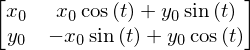

In [16]:
G = spy.Matrix([
    [x0, y0],
    (Phi_k.subs(k,1)*spy.Matrix([x0, y0])).T
]).T
G

Determine the $V$ modes of the SVD of $\Gamma$

First, determine the eigendecomposition of 

$M_v = \Gamma^T \Gamma = $

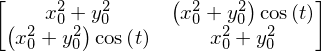

In [779]:
M_v = (x0**2 + y0**2)*spy.Matrix([
    [1, spy.cos(t)],
    [spy.cos(t), 1]
])
M_v

**TEST** Verify $M_v$ defined above is equal to $\Gamma^T \Gamma$.

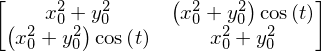

In [19]:
spy.simplify(G.T*G)

In [782]:
lamda = spy.symbols('lamda')

In [785]:
spy.factor(M_v.charpoly(lamda), lamda)

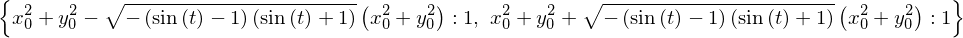

In [787]:
M_v.eigenvals()

__Eigendecomposition__

We can see that the eigenvalues $\lambda_{\pm}$ are give by 

\begin{equation}
\lambda_{\pm} = (x_0^2 + y_0^2)(1 \pm cos(t))
\end{equation}

These eigenvalues can be simplified as

In [39]:
lambda_v1 = 2*(x0**2 + y0**2)*spy.cos(t/2)**2
lambda_v2 = 2*(x0**2 + y0**2)*spy.sin(t/2)**2

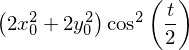

In [53]:
lambda_v1

In [45]:
sigma_1 = spy.sqrt(2*(x0**2 + y0**2))*spy.Abs(spy.cos(t/2))
sigma_2 = spy.sqrt(2*(x0**2 + y0**2))*spy.Abs(spy.sin(t/2))

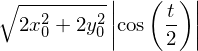

In [54]:
sigma_1

In [28]:
from sympy.simplify.fu import TR9

So, $\Sigma$ is equal to 

\begin{equation*}
    \Sigma = 
    \begin{pmatrix}
    \sqrt{1 + cos(t)} & 0\\
    0 & \sqrt{1 - cos(t)}
    \end{pmatrix}
\end{equation*}

Hence, the correspodning eigenvectors $[v_+, v_-]$ will be 

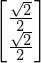

In [55]:
v1 = 1/spy.sqrt(2) * spy.Matrix([1, 1])
spy.factor(v1)

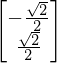

In [56]:
v2 = 1/spy.sqrt(2) * spy.Matrix([-1, 1])
spy.factor(v2)

Hence,

\begin{equation*}
    V = \frac{1}{\sqrt{2}}
    \begin{pmatrix}
    1 & -1\\
    1 & 1
    \end{pmatrix}
\end{equation*}

So, to find the column vectors of $U$, we simply solve the equations

\begin{equation}
    \Gamma v_{\pm} = \sigma_{\pm} u_{\pm}
\end{equation}

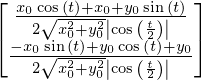

In [57]:
spy.simplify(G*v1/sigma_1)

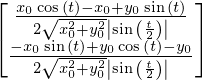

In [58]:
spy.simplify(G*v2/sigma_2)

Expansion


In [62]:
theta, omega,pi,t = spy.symbols('theta omega pi t')

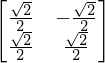

In [109]:
V = 1/spy.sqrt(2) * spy.Matrix([
    [1, -1],
    [1, 1]
])
V

In [98]:
r = spy.symbols('r')

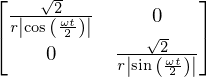

In [110]:
Sigma_inv = spy.sqrt(2)/r * spy.Matrix([
    [1/spy.Abs(spy.cos(omega*t/2)), 0],
    [0, 1/spy.Abs(spy.sin(omega*t/2))]
])
Sigma_inv

In [111]:
U = spy.Matrix([
    spy.functions.sign(spy.cos(omega*t/2))*spy.Matrix([spy.cos(theta - omega*t/2), spy.sin(theta - omega*t/2)]).T,
    spy.functions.sign(spy.sin(omega*t/2))*spy.Matrix([spy.sin(theta - omega*t/2), -spy.cos(theta - omega*t/2)]).T
]).T

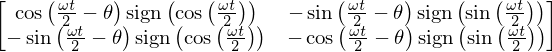

In [112]:
U

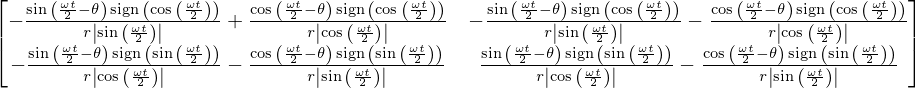

In [183]:
U.T*Sigma_inv*V

### Reconstruction of Trajectory Matrix from SVD ($m=1$)

### Reconstruction of A from trajectory matrices ($m=1$)

Show that 

\begin{equation}
A = D_1^2  (D_0^1)^{-1}
\end{equation}

> Polar representation of $D_0^1$ = 

\begin{equation*}
    \begin{bmatrix}
        x_0 & x_1\\
        y_0 & y_1
    \end{bmatrix}
    =
\end{equation*}

In [62]:
theta, omega,pi,t = spy.symbols('theta omega pi t')

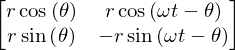

In [164]:
D0 = r*spy.Matrix([
    [spy.cos(theta), spy.cos(theta - omega*t)],
    [spy.sin(theta), spy.sin(theta - omega*t)]
])
D0

Then, we have that it's inverse is 

> $(D_0^1)^{-1} = $

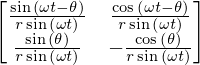

In [169]:
spy.trigsimp(D0.inv())

Using polar representation, we can also define the forward-trajectory matrix 

> $D_1^2 = $

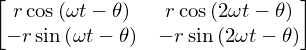

In [167]:
D1 = r*spy.Matrix([
    [spy.cos(theta - omega*t), spy.cos(theta - 2*omega*t)],
    [spy.sin(theta - omega*t), spy.sin(theta - 2*omega*t)]
])
D1

Then, we compute the product

> $D_1^2  (D_0^1)^{-1} = $

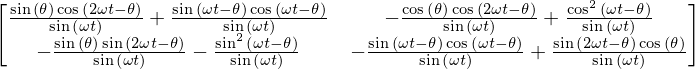

In [170]:
M = D1*spy.trigsimp(D0.inv())
M

However, the entries of this can be simplified as

In [171]:
from sympy import trigsimp,expand, expand_trig

def my_simplification(x):
    # First, expand expresions trigonometrically
    # Second, expand expressions algebraically
    # Third, simplify expressions trigonometrically
    return trigsimp(expand(expand_trig(x)))

# Output matrix with simplified entries
M_out = spy.Matrix([[1,1],[1,1]])

for i in range(len(M)):
    entry = my_simplification(M[i])
    M_out[i] = entry

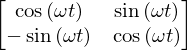

In [172]:
M_out

In [186]:
MM = spy.Matrix([
    [spy.cos(theta)**2, spy.sin(theta)*spy.cos(theta)],
    [spy.sin(theta)*spy.cos(theta), spy.sin(theta)**2]
])

ValueError: Matrix det == 0; not invertible.

This is the original rotation matrix.

> $m = 2$ , i.e., one time-step

In [717]:
a = spy.symbols('a')

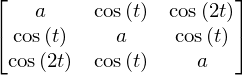

In [718]:
Mv = spy.Matrix([
    [a, spy.cos(t), spy.cos(2*t)],
    [spy.cos(t), a, spy.cos(t)],
    [spy.cos(2*t), spy.cos(t), a]
])
Mv

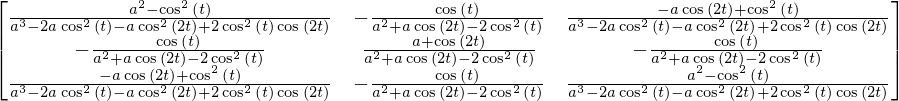

In [723]:
spy.trigsimp(spy.simplify(Mv.inv()))

Eigendecomposition

In [581]:
spy.trigsimp(Mv.charpoly())

In [582]:
spy.factor(spy.trigsimp(Mv.charpoly()))

In [132]:
spy.expand_trig(spy.trigsimp(spy.expand(spy.expand_trig(spy.cos(omega*t -theta)*spy.sin(omega*t -theta) + spy.cos(2*omega*t -theta)*spy.sin(theta)))))

In [133]:
spy.expand_trig(spy.trigsimp(spy.expand(spy.expand_trig(spy.cos(omega*t -theta)*spy.cos(omega*t -theta) - spy.cos(2*omega*t -theta)*spy.cos(theta)))))

In [138]:
spy.expand_trig(spy.trigsimp(spy.expand(spy.expand_trig(-spy.sin(omega*t -theta)*spy.sin(omega*t -theta) - spy.sin(2*omega*t -theta)*spy.sin(theta)))))

In [139]:
spy.expand_trig(spy.trigsimp(spy.expand(spy.expand_trig(-spy.sin(omega*t -theta)*spy.cos(omega*t -theta) + spy.sin(2*omega*t -theta)*spy.cos(theta)))))

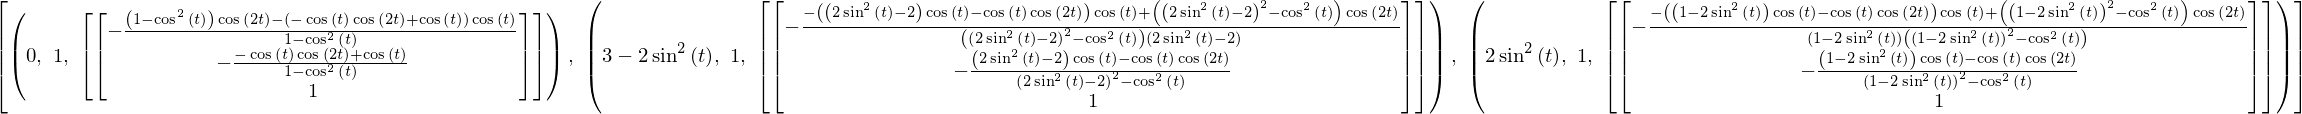

In [551]:
spy.simplify(Mv.eigenvects())

$m = 3$ , i.e., one time-step

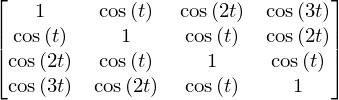

In [585]:
Mv = spy.Matrix([
    [1, spy.cos(t), spy.cos(2*t), spy.cos(3*t)],
    [spy.cos(t), 1, spy.cos(t), spy.cos(2*t)],
    [spy.cos(2*t), spy.cos(t), 1, spy.cos(t)],
    [spy.cos(3*t), spy.cos(2*t), spy.cos(t), 1]
])
Mv

Eigendecomposition

In [586]:
spy.trigsimp(Mv.charpoly())

$m = 4$

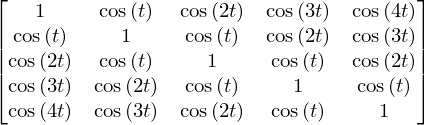

In [588]:
Mv = spy.Matrix([
    [1, spy.cos(t), spy.cos(2*t), spy.cos(3*t), spy.cos(4*t)],
    [spy.cos(t), 1, spy.cos(t), spy.cos(2*t), spy.cos(3*t)],
    [spy.cos(2*t), spy.cos(t), 1, spy.cos(t), spy.cos(2*t)],
    [spy.cos(3*t), spy.cos(2*t), spy.cos(t), 1, spy.cos(t)],
    [spy.cos(4*t), spy.cos(3*t), spy.cos(2*t), spy.cos(t), 1]
])
Mv

### Calculation of $M_u$

Oter Products between columns

> $\phi_{(1)}^k (\phi_{(1)}^k)^T = $

In [282]:
p11 = Phi_k.col(0)*Phi_k.col(0).T
p11

Matrix([
[       cos(k*t)**2, -sin(k*t)*cos(k*t)],
[-sin(k*t)*cos(k*t),        sin(k*t)**2]])

Then, 

\begin{equation}
    M_1 = \sum_{k=0}^m \phi_{(1)}^k (\phi_{(1)}^k)^T = 
        \begin{pmatrix}
        S_2 & -S_3\\
        -S_3 & S_1
        \end{pmatrix}
\end{equation}

> $\phi_{(2)}^k (\phi_{(2)}^k)^T = $

In [283]:
p22 = Phi_k.col(1)*Phi_k.col(1).T
p22

Matrix([
[      sin(k*t)**2, sin(k*t)*cos(k*t)],
[sin(k*t)*cos(k*t),       cos(k*t)**2]])

Then,

\begin{equation}
    M_2 = \sum_{k=0}^m \phi_{(2)}^k (\phi_{(2)}^k)^T = 
        \begin{pmatrix}
        S_1 & S_3\\
        S_3 & S_2
        \end{pmatrix}
\end{equation}

> $\phi_{(1)}^k (\phi_{(2)}^k)^T = $

In [284]:
p12 = Phi_k.col(0)*Phi_k.col(1).T
p12

Matrix([
[sin(k*t)*cos(k*t),        cos(k*t)**2],
[     -sin(k*t)**2, -sin(k*t)*cos(k*t)]])

Then,

\begin{equation}
    M_3 = \sum_{k=0}^m \phi_{(1)}^k (\phi_{(2)}^k)^T = 
        \begin{pmatrix}
        S_3 & S_2\\
        -S_1 & -S_3
        \end{pmatrix}
\end{equation}

> $\phi_{(2)}^k (\phi_{(1)}^k)^T = $

In [285]:
p21 = Phi_k.col(1)*Phi_k.col(0).T
p21

Matrix([
[sin(k*t)*cos(k*t),       -sin(k*t)**2],
[      cos(k*t)**2, -sin(k*t)*cos(k*t)]])

Then,

\begin{equation}
    M_4 = \sum_{k=0}^m \phi_{(2)}^k (\phi_{(1)}^k)^T = 
        \begin{pmatrix}
        S_3 & -S_1\\
        S_2 & -S_3
        \end{pmatrix}
\end{equation}

> $\phi_{(1)}^k (\phi_{(2)}^k)^T + \phi_{(2)}^k (\phi_{(1)}^k)^T= $

In [287]:
p21+p12

Matrix([
[       2*sin(k*t)*cos(k*t), -sin(k*t)**2 + cos(k*t)**2],
[-sin(k*t)**2 + cos(k*t)**2,       -2*sin(k*t)*cos(k*t)]])

Define matrix entries

In [62]:
m = spy.symbols('m')

$\sum_{k=0}^m sin^2(k t) = $

In [80]:
S1 = (m-1)/2 - spy.Rational(1,2)*spy.sin(m*t)*spy.cos((m+1)*t)/spy.sin(t)
S1

m/2 - 1/2 - sin(m*t)*cos(t*(m + 1))/(2*sin(t))

$\sum_{k=0}^m cos^2(k t) = $

In [81]:
S2 = (m+1)/2 - spy.Rational(1,2)*spy.sin(m*t)*spy.cos((m+1)*t)/spy.sin(t)
S2

m/2 + 1/2 - sin(m*t)*cos(t*(m + 1))/(2*sin(t))

$\sum_{k=0}^m sin(k \omega \Delta t) cos(k \omega \Delta t) = $

In [82]:
S3 = spy.Rational(1,2)*spy.sin(m*t)*spy.sin((m+1)*t)/spy.sin(t)
S3

sin(m*t)*sin(t*(m + 1))/(2*sin(t))

Define matrices from entries

In [85]:
M1 = spy.Matrix([
    [S2, -S3],
    [-S3, S1]
])
M1

Matrix([
[m/2 + 1/2 - sin(m*t)*cos(t*(m + 1))/(2*sin(t)),            -sin(m*t)*sin(t*(m + 1))/(2*sin(t))],
[           -sin(m*t)*sin(t*(m + 1))/(2*sin(t)), m/2 - 1/2 - sin(m*t)*cos(t*(m + 1))/(2*sin(t))]])

In [86]:
M2 = spy.Matrix([
    [S1, S3],
    [S3, S2]
])
M2

Matrix([
[m/2 - 1/2 - sin(m*t)*cos(t*(m + 1))/(2*sin(t)),             sin(m*t)*sin(t*(m + 1))/(2*sin(t))],
[            sin(m*t)*sin(t*(m + 1))/(2*sin(t)), m/2 + 1/2 - sin(m*t)*cos(t*(m + 1))/(2*sin(t))]])

In [288]:
M3 = spy.Matrix([
    [S3, S2],
    [-S1, -S3]
])
M3

Matrix([
[             sin(m*t)*sin(t*(m + 1))/(2*sin(t)), m/2 + 1/2 - sin(m*t)*cos(t*(m + 1))/(2*sin(t))],
[-m/2 + 1/2 + sin(m*t)*cos(t*(m + 1))/(2*sin(t)),            -sin(m*t)*sin(t*(m + 1))/(2*sin(t))]])

In [289]:
M4 = spy.Matrix([
    [S3, -S1],
    [S2, -S3]
])
M3

Matrix([
[             sin(m*t)*sin(t*(m + 1))/(2*sin(t)), m/2 + 1/2 - sin(m*t)*cos(t*(m + 1))/(2*sin(t))],
[-m/2 + 1/2 + sin(m*t)*cos(t*(m + 1))/(2*sin(t)),            -sin(m*t)*sin(t*(m + 1))/(2*sin(t))]])

Define $M$ 


In [88]:
x0,y0 = spy.symbols('x0 y0')

$M_u = $

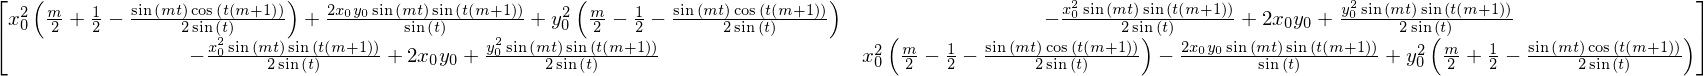

In [597]:
M = x0**2*M1 + y0**2*M2 + 2*x0*y0*(M3+M4)
spy.trigsimp(M)

### Calculation of Singular Values

To compute the singular values of $M_u$ and the corresponding eigenvectors

\begin{equation}
M_u = \Gamma \Gamma^T = U \Lambda_u U^T
\end{equation}

where $\Lambda_u$ is actually equal to $\Sigma \Sigma^T$, hence $\lambda_u = \sigma^2 \geq 0$, the eigenvalues of $M_u$ are non-negative. 

Since $M_u$ is a $\mathbb{R}^{2 \times 2}$ matrix, $\lambda_u$ will correspond to the roots of 

\begin{equation*}
\lambda_u^2 - \lambda_u Tr(M_u) + det(M_u) = 0
\end{equation*}

given by 

\begin{equation*}
\lambda_u = \frac{1}{2} Tr(M_u) \pm \frac{1}{2}\sqrt{Tr(M_u)^2 - 4 det(M_u)}
\end{equation*}

Since, $\lambda_u = \sigma^2 \geq 0$, we examine the following cases

* $\sigma = 0$, then, $det(M_u) = 0$ must hold.
* $\sigma \neq 0$, then, $\lambda_u > 0$, and $Tr(M_u)^2 > 4 det(M_u) > 0$ must hold.

Then, we compute 

$Tr(M_u)$ = 

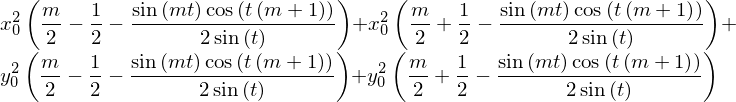

In [598]:
M_tr = M.trace()
M_tr

$det(M_u) = $

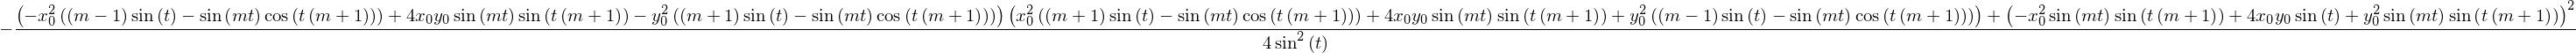

In [599]:
M_det = spy.simplify(M.det())
M_det

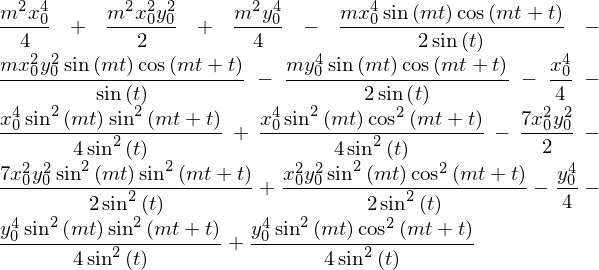

In [600]:
spy.expand(M.det())

__NOTE__

* We see that $det(M_u)$ is a _symmetric function_ for $x_0$ and $y_0$, since all powers are even.

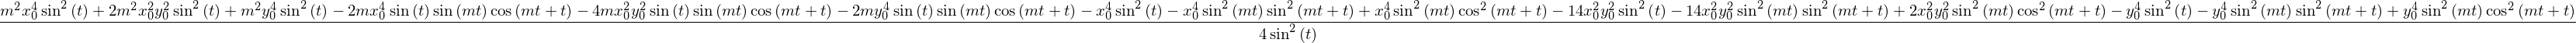

In [601]:
spy.factor(M.det())

CASE: $det(M)$ for $m=1$, that is, one single step iteration.

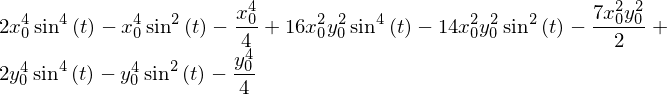

In [602]:
M_det_m1 = spy.simplify(M_det.subs(m,1))
M_det_m1

Then, as done for our simulation. Assume $\omega = 1$ and $\Delta t = 1$. So, $t = 1$, so that the above gets reduced to

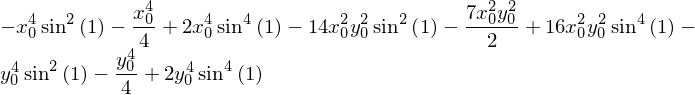

In [603]:
M_det_m1.subs(t,1)

Plot the above 

In [604]:
f = M_det.subs([(m,10),(t,1)])

In [605]:
g = (M_tr**2 - 4*M_det).subs([(m,10),(t,1)])

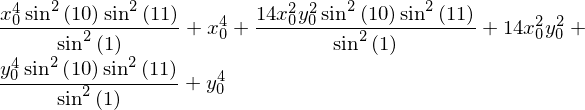

In [606]:
spy.simplify(g)

Now determine the singular values $\sigma_1^2$ and $\sigma_2^2$

In [607]:
lamda_p = (spy.Rational(1,2)*M_tr + spy.sqrt(M_tr**2 - 4*M_det)).subs([(m,10),(t,1)])
lamda_n = (spy.Rational(1,2)*M_tr - spy.sqrt(M_tr**2 - 4*M_det)).subs([(m,10),(t,1)])

$\lambda_u^+ = \sigma_1^2 = $

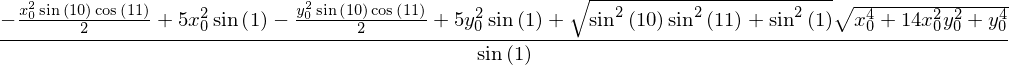

In [608]:
spy.simplify(lamda_p)

$\lambda_u^- = \sigma_2^2 = $

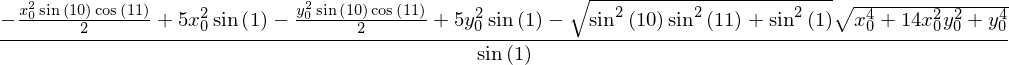

In [609]:
spy.simplify(lamda_n)

### Plots

In [468]:
from sympy.plotting import plot3d

<IPython.core.display.Javascript object>


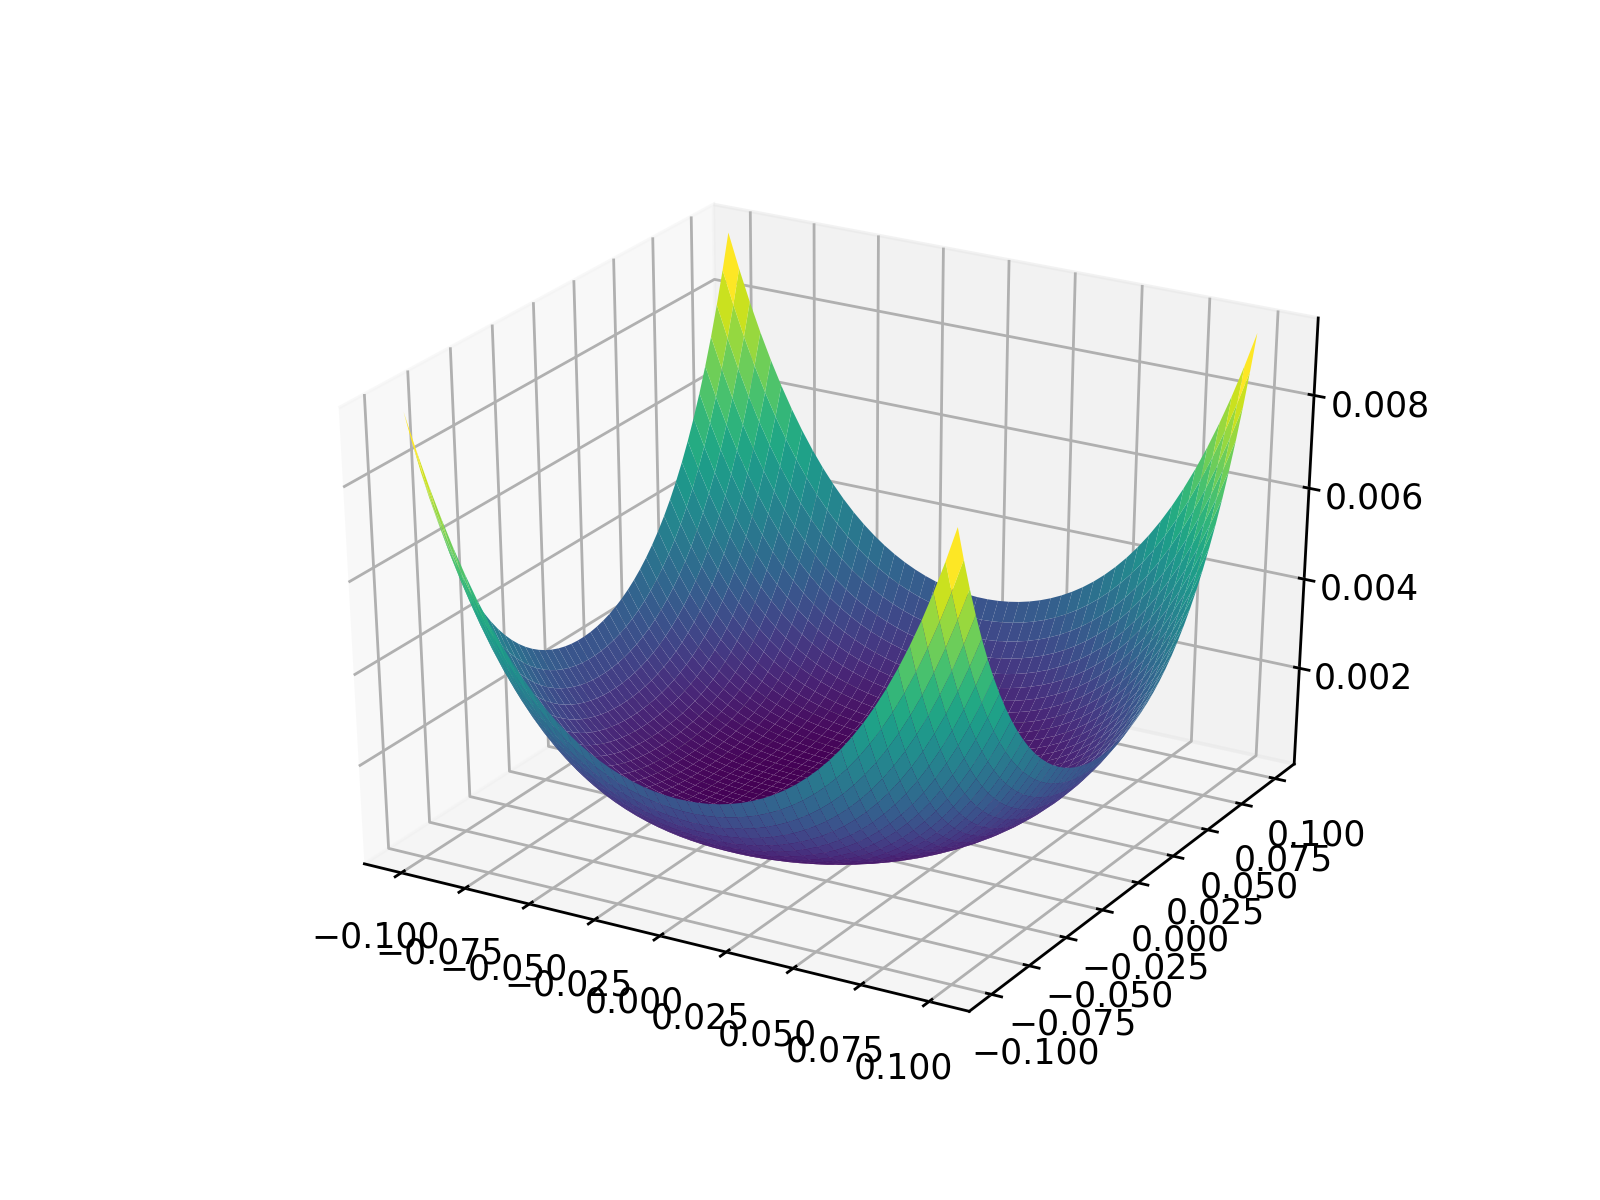

In [469]:
%matplotlib notebook
plot3d(f, (x0, -0.1, 0.1), (y0, -0.1, 0.1))

<IPython.core.display.Javascript object>


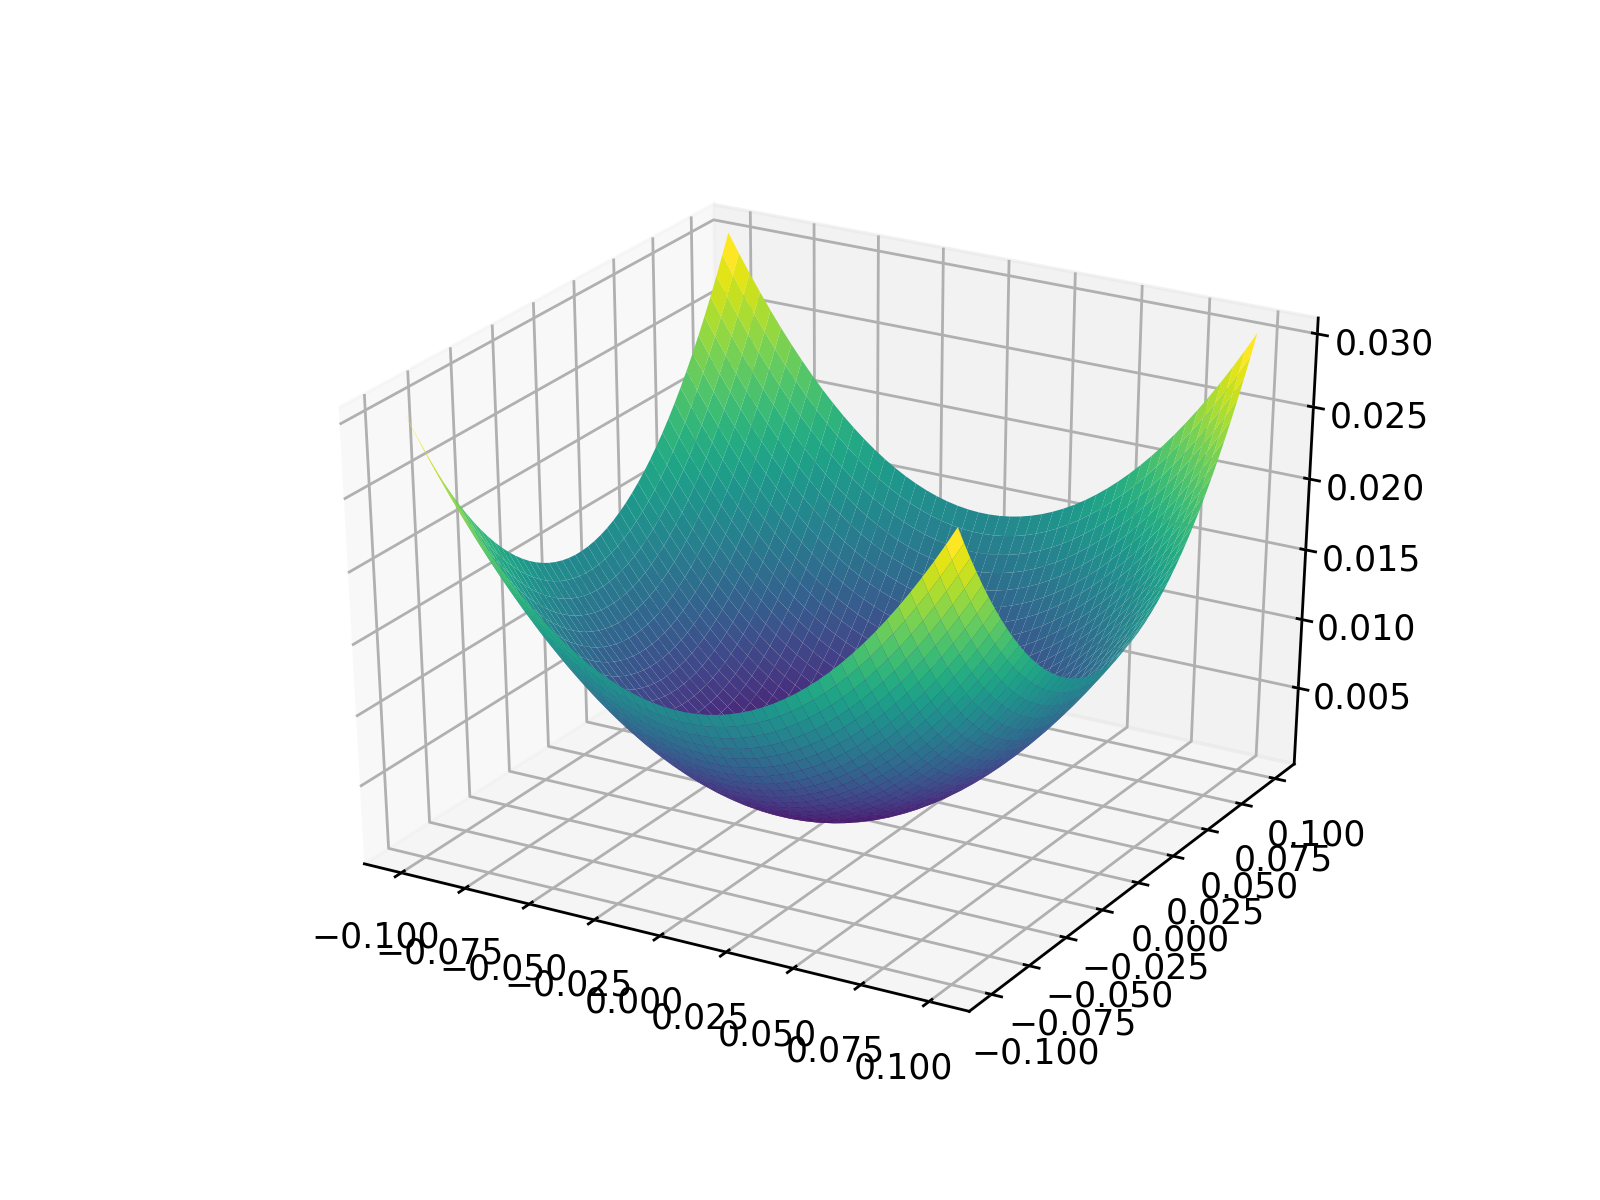

In [427]:
%matplotlib notebook
plot3d(g, (x0, -0.1, 0.1), (y0, -0.1, 0.1))

<IPython.core.display.Javascript object>


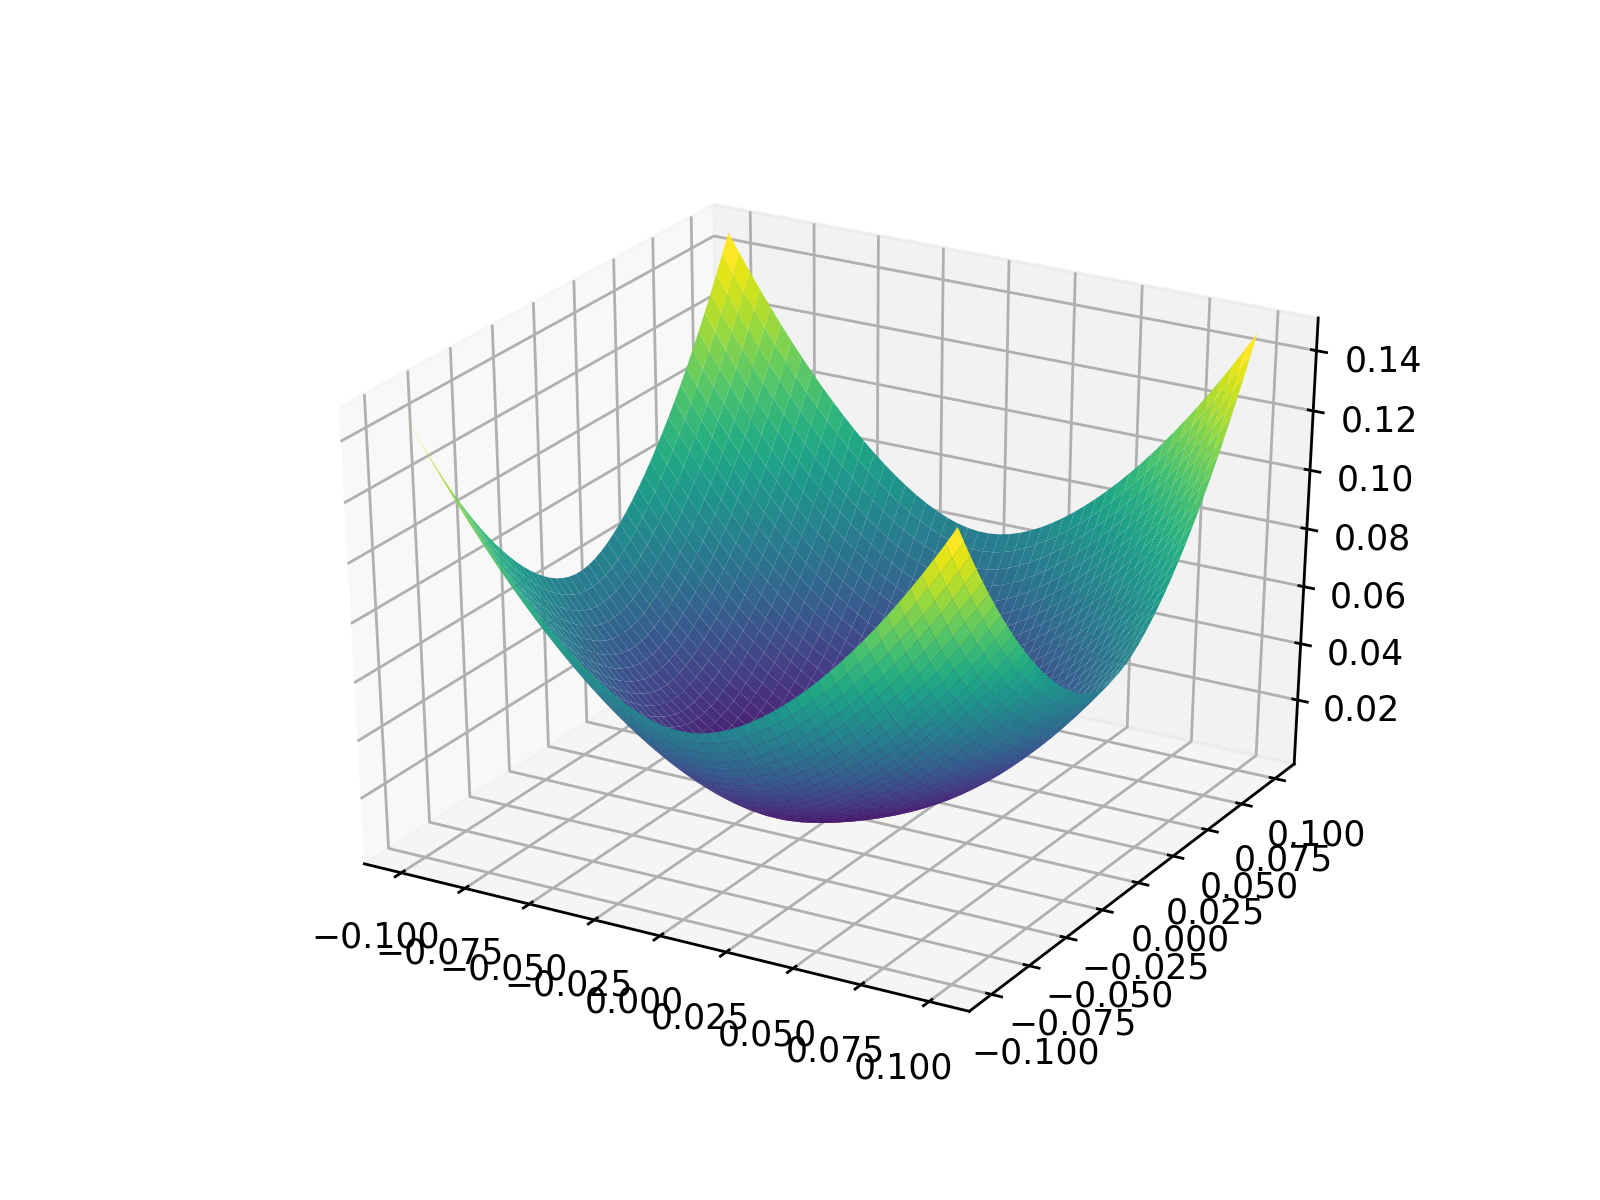

In [610]:
%matplotlib notebook
plot3d(lamda_p, (x0, -0.1, 0.1), (y0, -0.1, 0.1))

<IPython.core.display.Javascript object>


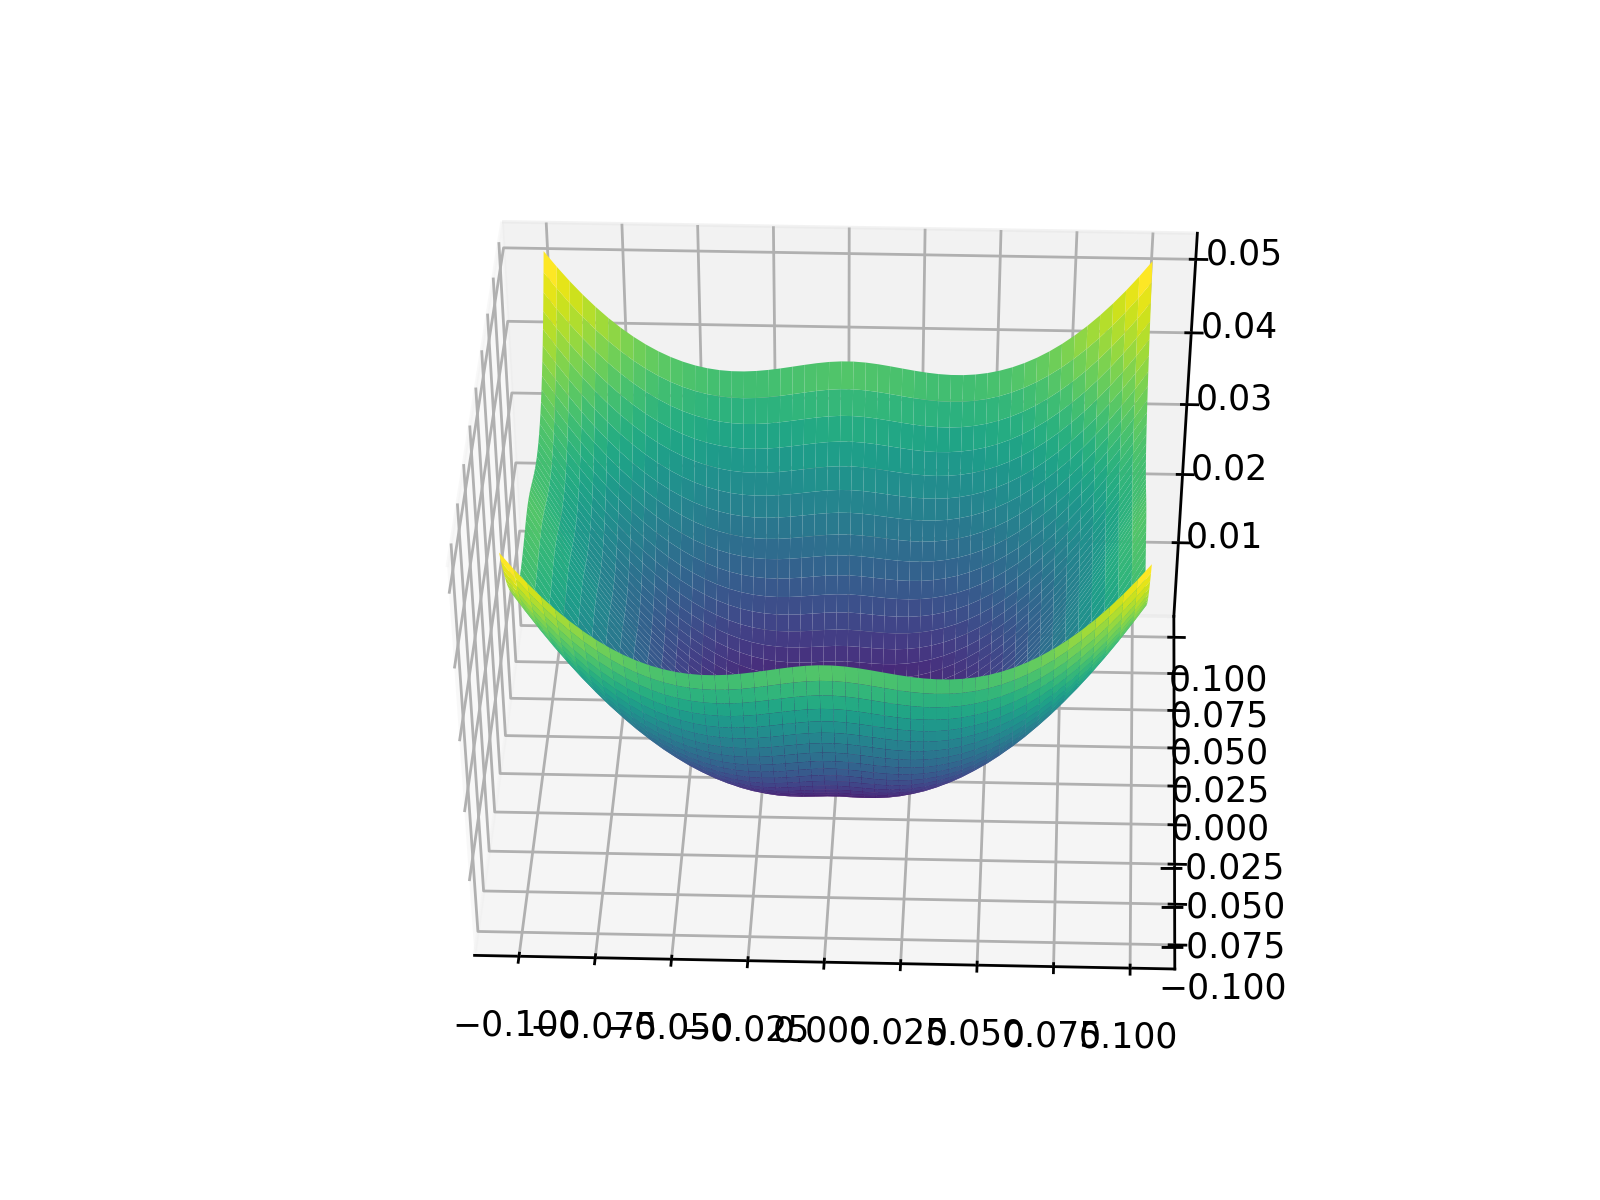

In [483]:
%matplotlib notebook
plot3d(lamda_n, (x0, -0.1, 0.1), (y0, -0.1, 0.1))

Standard MatPlotLib method

In [611]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import cm

In [612]:
f = spy.lambdify((x0, y0), f, 'numpy')
g = spy.lambdify((x0, y0), g, 'numpy')
lamda_p = spy.lambdify((x0, y0), lamda_p, 'numpy')
lamda_n = spy.lambdify((x0, y0), lamda_n, 'numpy')

<IPython.core.display.Javascript object>


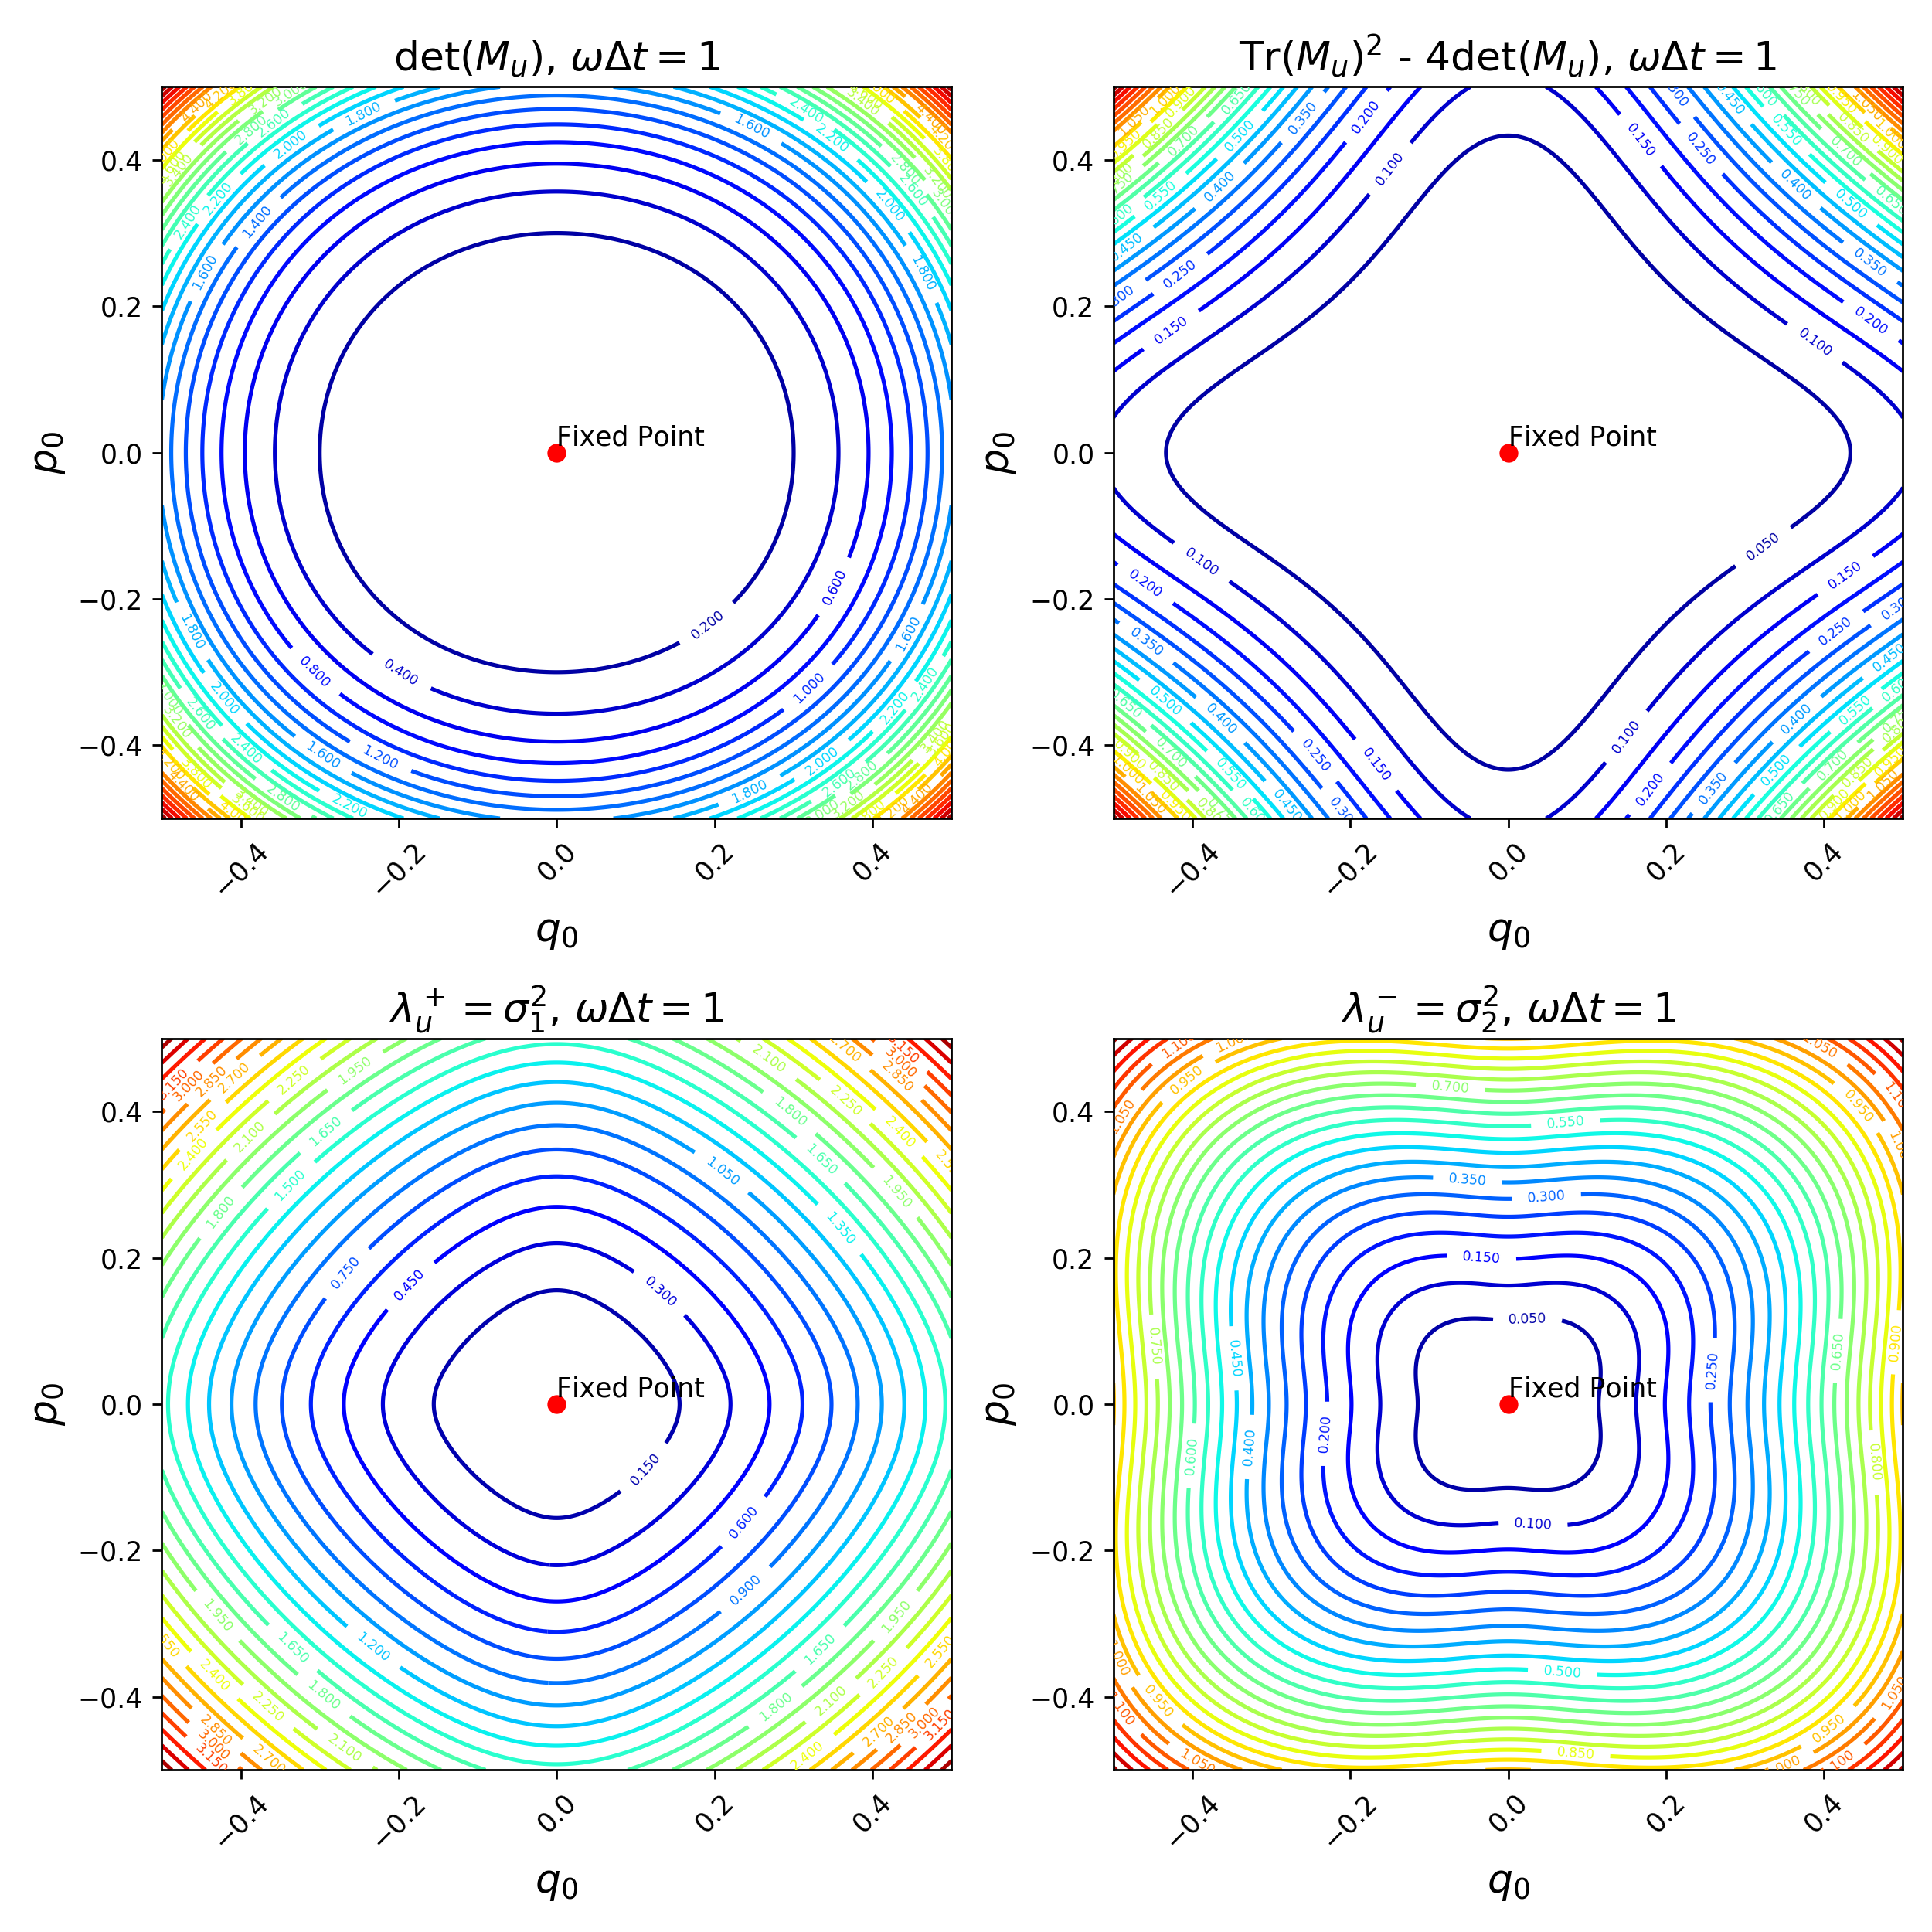

In [616]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
a = numpy.linspace(-0.5, 0.5, 1000)
b = numpy.linspace(-0.5, 0.5, 1000)
x, y = numpy.meshgrid(a, b)

#################################################
CS1 = ax[0,0].contour(x,y,f(x, y),levels=30,cmap='jet')
ax[0,0].clabel(CS1,inline=1,fontsize=5)
ax[0,0].set_title('det($M_u$), $\omega \Delta t = 1$',fontsize=15)
ax[0,0].set_xlabel('$q_0$',fontsize=15)
ax[0,0].set_ylabel('$p_0$',fontsize=15)

ax[0,0].tick_params('x',rotation = 45)

# Fixed point
ax[0,0].scatter(0,0,c='red')
ax[0,0].text(0,0.01,'Fixed Point',fontsize=10)

#################################################
CS2 = ax[0,1].contour(x,y,g(x, y),levels=30,cmap='jet')
ax[0,1].clabel(CS2,inline=1,fontsize=5)
ax[0,1].set_title('Tr($M_u$)$^2$ - 4det($M_u$), $\omega \Delta t = 1$',fontsize=15)
ax[0,1].set_xlabel('$q_0$',fontsize=15)
ax[0,1].set_ylabel('$p_0$',fontsize=15)

ax[0,1].tick_params('x',rotation = 45)

# Fixed point
ax[0,1].scatter(0,0,c='red')
ax[0,1].text(0,0.01,'Fixed Point',fontsize=10)

#################################################
# Lambda 1
CS3 = ax[1,0].contour(x,y,lamda_p(x, y),levels=30,cmap='jet')
ax[1,0].clabel(CS3,inline=1,fontsize=5)
ax[1,0].set_title('$\lambda_u^+ = \sigma_1^2$, $\omega \Delta t = 1$',fontsize=15)
ax[1,0].set_xlabel('$q_0$',fontsize=15)
ax[1,0].set_ylabel('$p_0$',fontsize=15)

ax[1,0].tick_params('x',rotation = 45)

# Fixed point
ax[1,0].scatter(0,0,c='red')
ax[1,0].text(0,0.01,'Fixed Point',fontsize=10)
#################################################
# Lambda 2
CS4 = ax[1,1].contour(x,y,lamda_n(x, y),levels=30,cmap='jet')
ax[1,1].clabel(CS4,inline=1,fontsize=5)
ax[1,1].set_title('$\lambda_u^- = \sigma_2^2$, $\omega \Delta t = 1$',fontsize=15)
ax[1,1].set_xlabel('$q_0$',fontsize=15)
ax[1,1].set_ylabel('$p_0$',fontsize=15)

ax[1,1].tick_params('x',rotation = 45)

# Fixed point
ax[1,1].scatter(0,0,c='red')
ax[1,1].text(0,0.01,'Fixed Point',fontsize=10)

fig.tight_layout()
plt.show()

### Computation of $V$ modes

## SVD of $A_c$

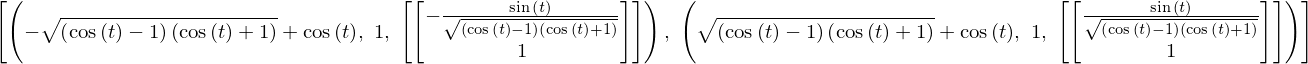

In [641]:
Phi.eigenvects()

#### Calculation of $M_v$

We have that

\begin{equation*}
    M_v = \Gamma^T \Gamma = V (\Sigma^T \Sigma) V^T
\end{equation*}

We want to solve the eigenvalue problem

\begin{equation*}
    M_v = V \Lambda_v V^T
\end{equation*}

\begin{equation}
    \Gamma^T \Gamma = x_0^2 \left( (\phi_{(1)}^i)^T \phi_{(1)}^j \right) + y_0^2 \left( (\phi_{(2)}^i)^T \phi_{(2)}^j \right) + x_0 y_0 \left( (\phi_{(1)}^i)^T \phi_{(2)}^j + (\phi_{(2)}^i)^T \phi_{(1)}^j\right)
    \label{eq:gtg_decomp}    
\end{equation}

Then, we compute the above matrices

In [494]:
i,j = spy.symbols('i j')

> $(\phi_{(1)}^i)^T \phi_{(1)}^j = $

In [499]:
p11_ij = Phi_k.col(0).subs(k,i).T*Phi_k.subs(k,j).col(0)
spy.trigsimp(p11_ij)

Matrix([[cos(t*(i - j))]])

> $(\phi_{(2)}^i)^T \phi_{(2)}^j = $

In [500]:
p22_ij = Phi_k.col(1).subs(k,i).T*Phi_k.subs(k,j).col(1)
spy.trigsimp(p22_ij)

Matrix([[cos(t*(i - j))]])

> $(\phi_{(1)}^i)^T \phi_{(2)}^j = $

In [501]:
p12_ij = Phi_k.col(0).subs(k,i).T*Phi_k.subs(k,j).col(1)
spy.trigsimp(p12_ij)

Matrix([[-sin(t*(i - j))]])

> $(\phi_{(2)}^i)^T \phi_{(1)}^j = $

In [502]:
p21_ij = Phi_k.col(1).subs(k,i).T*Phi_k.subs(k,j).col(0)
spy.trigsimp(p21_ij)

Matrix([[sin(t*(i - j))]])

Then, we have that the entry ($i,j$) of the matrix $M_v$ is

$(M_v)_{ij} = $

In [511]:
Mv_ij = x0**2*(p11_ij) + y0**2*(p22_ij) + x0*y0*(p12_ij + p21_ij)
Mv_ij = spy.trigsimp(Mv_ij)
Mv_ij

Matrix([[(x0**2 + y0**2)*cos(t*(i - j))]])

where $i,j = 1,2, \dots, m$

#### Cases for different trajectory lenghts

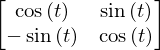

In [624]:
Phi

In [539]:
spy.init_printing(use_unicode=True)

$m = 1$ , i.e., one time-step

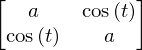

In [724]:
Mv = spy.Matrix([
    [a, spy.cos(t)],
    [spy.cos(t), a]
])
Mv

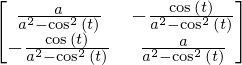

In [725]:
spy.trigsimp(Mv.inv())

Eigendecomposition

In [584]:
spy.factor(Mv.charpoly())

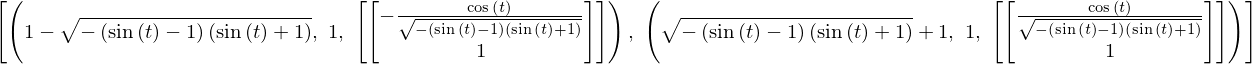

In [549]:
spy.simplify(Mv.eigenvects())

$m = 2$ , i.e., one time-step

In [717]:
a = spy.symbols('a')

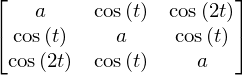

In [718]:
Mv = spy.Matrix([
    [a, spy.cos(t), spy.cos(2*t)],
    [spy.cos(t), a, spy.cos(t)],
    [spy.cos(2*t), spy.cos(t), a]
])
Mv

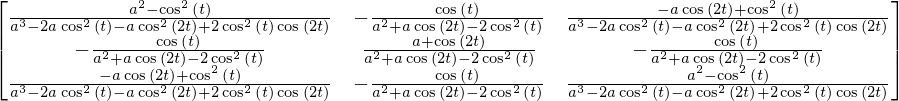

In [723]:
spy.trigsimp(spy.simplify(Mv.inv()))

Eigendecomposition

In [581]:
spy.trigsimp(Mv.charpoly())

In [582]:
spy.factor(spy.trigsimp(Mv.charpoly()))

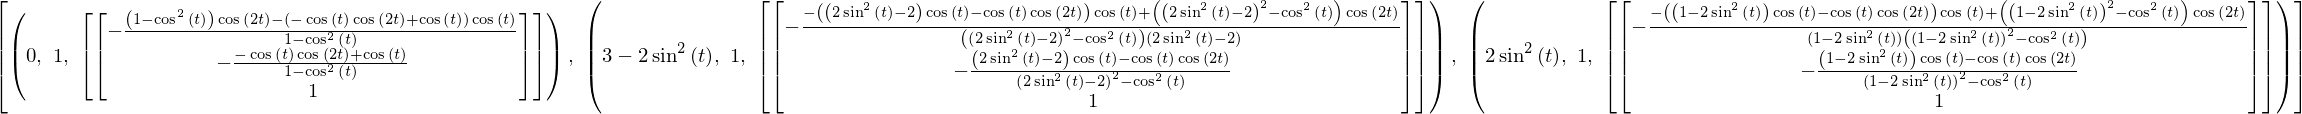

In [551]:
spy.simplify(Mv.eigenvects())

$m = 3$ , i.e., one time-step

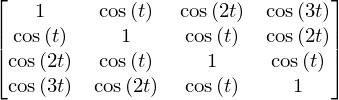

In [585]:
Mv = spy.Matrix([
    [1, spy.cos(t), spy.cos(2*t), spy.cos(3*t)],
    [spy.cos(t), 1, spy.cos(t), spy.cos(2*t)],
    [spy.cos(2*t), spy.cos(t), 1, spy.cos(t)],
    [spy.cos(3*t), spy.cos(2*t), spy.cos(t), 1]
])
Mv

Eigendecomposition

In [586]:
spy.trigsimp(Mv.charpoly())

$m = 4$

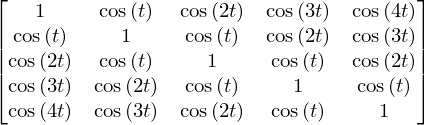

In [588]:
Mv = spy.Matrix([
    [1, spy.cos(t), spy.cos(2*t), spy.cos(3*t), spy.cos(4*t)],
    [spy.cos(t), 1, spy.cos(t), spy.cos(2*t), spy.cos(3*t)],
    [spy.cos(2*t), spy.cos(t), 1, spy.cos(t), spy.cos(2*t)],
    [spy.cos(3*t), spy.cos(2*t), spy.cos(t), 1, spy.cos(t)],
    [spy.cos(4*t), spy.cos(3*t), spy.cos(2*t), spy.cos(t), 1]
])
Mv

Eigendecomposition

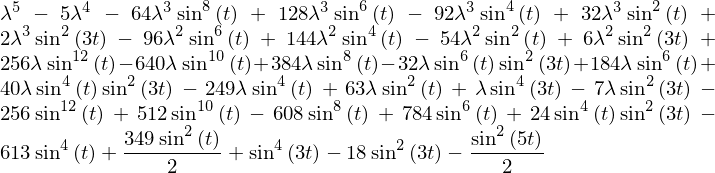

In [596]:
spy.trigsimp(spy.expand(Mv.charpoly()))

In [628]:
omega = spy.symbols('omega')
Ac = Phi.subs(t,omega*t)

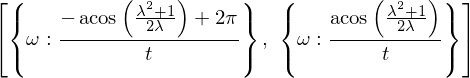

In [638]:
spy.solve(Ac.charpoly())

It's easy to see that 

$A_c A_c^T = A_c^T A_c = I$

In [621]:
I = spy.Matrix([
    [1,0],
    [0,1]
])

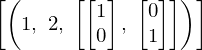

In [623]:
I.eigenvects()

SVD of the identity

In [642]:
I = numpy.array([[1,0],[0,1]])

In [645]:
numpy.linalg.svd(I)

(array([[1., 0.],
        [0., 1.]]), array([1., 1.]), array([[1., 0.],
        [0., 1.]]))

In [646]:
t = numpy.pi/3

In [648]:
A = numpy.array([
    [numpy.cos(t), numpy.sin(t)],
    [-numpy.sin(t), numpy.cos(t)]
])

In [662]:
A.dot(A.T)

array([[ 1.00000000e+00, -1.48741681e-17],
       [-1.48741681e-17,  1.00000000e+00]])

In [663]:
numpy.allclose(A.dot(A.T), I)

True

In [665]:
u, s, vh = numpy.linalg.svd(A)

In [666]:
u

array([[-0.5      ,  0.8660254],
       [ 0.8660254,  0.5      ]])

In [667]:
s

array([1., 1.])

In [668]:
vh

array([[-1., -0.],
       [ 0.,  1.]])

In [674]:
numpy.linalg.multi_dot([u,numpy.diag(s),vh])

array([[ 0.5      ,  0.8660254],
       [-0.8660254,  0.5      ]])

In [679]:
A

array([[ 0.5      ,  0.8660254],
       [-0.8660254,  0.5      ]])

SVD of $A_s$

In [687]:
from sympy.functions import sinh, cosh

t = spy.symbols('t')

A_s = spy.Matrix([
    [cosh(t), sinh(t)],
    [sinh(t), cosh(t)]
])

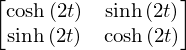

In [700]:
M_v = spy.simplify(A_s.T*A_s)
M_v

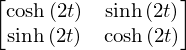

In [701]:
M_v = spy.simplify(A_s*A_s.T)
M_v

In [697]:
M_v.charpoly()

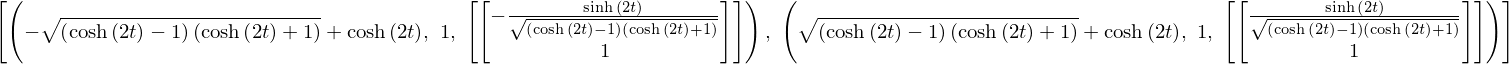

In [699]:
M_v.eigenvects()

# Hamiltonian saddle

## Dynamic Equations

Hamiltonian 

\begin{equation}
    H(q,p) = \frac{\lambda}{2}(p^2 - q^2)
\end{equation}

Hamilton's equations (Hamiltonian vector field)

\begin{align*}
    \dot{q} &= \frac{\partial H}{\partial p} = \lambda p \\
    \dot{p} &= -\frac{\partial H}{\partial q} = \lambda q
\end{align*}

Analytical solution for initial conditions $(q_0, p_0) \in \mathbb{R}^2$


\begin{equation*}
\begin{pmatrix}
    q(\Delta t)\\
    p(\Delta t)
\end{pmatrix}
    =
    \begin{pmatrix}
        \cosh \lambda \Delta t & \sinh \lambda \Delta t \\
        \sinh \lambda \Delta t & \cosh \lambda \Delta t
    \end{pmatrix}
    \begin{pmatrix}
        q_0\\
        p_0
    \end{pmatrix}
\end{equation*}

## Simulating orbits

Take $\lambda = 1$ and $\Delta t = 1$

Define domain for I.Cs : $(q_0, p_0) \in [-1,1] \times[-1,1] \subset \mathbb{R}^2$

In [135]:
l=1
dt=0.1
a_11 = numpy.cosh(l*dt)
a_12 = numpy.sinh(l*dt)
a_21 = a_12
a_22 = a_11 

A_0 = numpy.matrix([
    [a_11, a_12],
    [a_21, a_22]
    ])

In [136]:
A_0

matrix([[1.00500417, 0.10016675],
        [0.10016675, 1.00500417]])

In [137]:
import numpy

def dynamics(x0,l=1,dt=0.1):
    a_11 = numpy.cosh(l*dt)
    a_12 = numpy.sinh(l*dt)
    a_21 = a_12
    a_22 = a_11 
    
    A = numpy.matrix([
        [a_11, a_12],
        [a_21, a_22]
        ])
    
    x = numpy.matmul(A, x0)
    return numpy.asarray(x)

Compute trajectories for $N$ iterations for all I.C.s

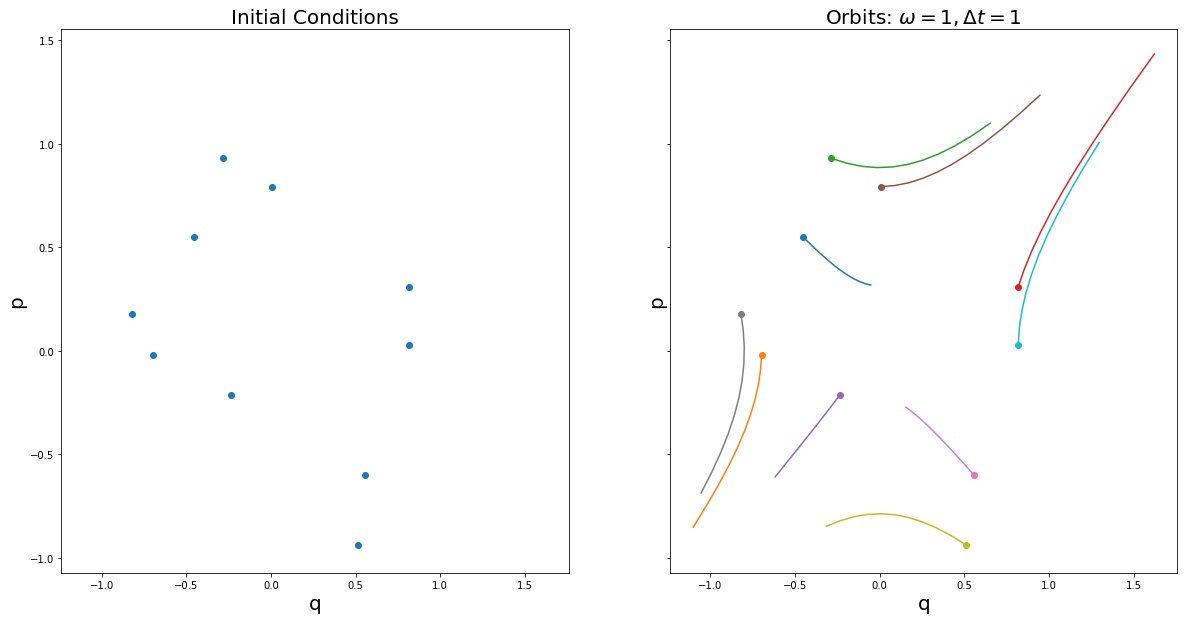

In [138]:
import matplotlib.pyplot as plt

N = 10 # number of ICs
x0 = 2*numpy.random.rand(2,N)-1 # Initial conditions
M = 10

fig,ax = plt.subplots(1,2,figsize=(20,10),sharex=True,sharey=True)

#################################################

# PLOT INITIAL CONDITIONS

#################################################
ax[0].scatter(*x0)
ax[0].set_title("Initial Conditions", fontsize=20)
ax[0].set_xlabel("q", fontsize=20)
ax[0].set_ylabel("p", fontsize=20)
#################################################

# PLOT ORBITS

#################################################
X  = [] # Orbits for M iterations
for n in range(M):
    X.append(x0)
    x = dynamics(x0)
    x0 = x

X.append(x0)
X = numpy.array(X).T

for n in range(N):
    x = X[n]
    q,p = numpy.array(x)
    ax[1].scatter(q[0],p[0])
    ax[1].plot(q,p)
    
ax[1].set_title("Orbits: $\omega = 1, \Delta t = 1$", fontsize=20)
ax[1].set_xlabel("q", fontsize=20)
ax[1].set_ylabel("p", fontsize=20)

plt.show()

In [139]:
A_0

matrix([[1.00500417, 0.10016675],
        [0.10016675, 1.00500417]])

## Dynamical evolution operator: reconstruction

In [140]:
dmd(X)

array([[ 0.94920008, -0.08318222],
       [-0.08318222,  1.06080825]])

In [141]:
numpy.linalg.eig(A_0)

(array([1.10517092, 0.90483742]), matrix([[ 0.70710678, -0.70710678],
         [ 0.70710678,  0.70710678]]))

In [148]:
numpy.linalg.eig(dmd(X).T)

(array([0.90483742, 1.10517092]), array([[-0.88235817,  0.47057844],
        [-0.47057844, -0.88235817]]))

__NOTE__ These matrices have identical eigenvalues, this means that $A_0$ and $\tilde{A}_{DMD}$ are similar. 

See https://math.stackexchange.com/questions/556257/show-that-two-matrices-with-the-same-eigenvalues-are-similar

# Hamiltonian saddle-centre

## Dynamic Equations

Hamiltonian 

\begin{equation}
    H(q_1,p_1,q_2,p_2) = \underbrace{H_1}_\text{reaction} + \underbrace{H_2}_\text{bath}
\end{equation}

\begin{equation}
    H_1(q_1,p_1) = \frac{\lambda}{2}(p_1^2 - q_2^2)\\
    H_2(q_2,p_2) = \frac{\omega}{2}(p_2^2 + q_2^2)
\end{equation}

Hamilton's equations (Hamiltonian vector field)

\begin{align*}
    \dot{q} &= \frac{\partial H}{\partial p} = \lambda p \\
    \dot{p} &= -\frac{\partial H}{\partial q} = \lambda q
\end{align*}

## Simulating orbits (NOT READY)

## Dynamical evolution operator: reconstruction

Research
* Recovery PS structures
* SVD numerical algorithm - check analytically
* Koopman operator - applied to CAT map? 
* DMD of CAT map?
* Selection of trajectories from some phase-space regions?


Book
* Fix Ches 1

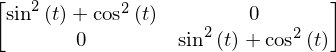

In [620]:
Phi.T*Phi